# Modelagem de Crédito para cartões

* Este trabalho seguiu o Modelo Crisp DM para seu desenvolvimento.

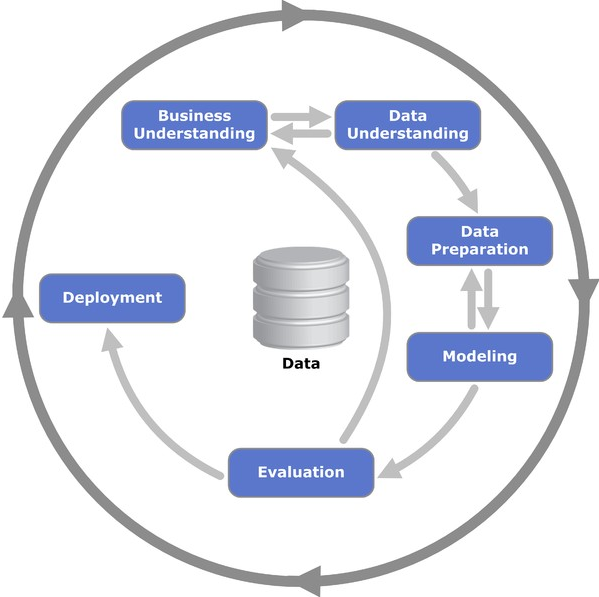

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/crisp_dm.png')

# Sumário pelo o método Crisp DM

1. Business Understanding: A concessão de cartões de crédito é um desafio crucial para instituições financeiras, que buscam equilibrar a expansão de sua base de clientes com a minimização de riscos associados a inadimplências. O problema reside em determinar, com base em um conjunto de variáveis explicativas como histórico de crédito, renda, idade e outros fatores socioeconômicos, se um solicitante é elegível para receber um cartão de crédito.

   A decisão incorreta pode resultar em perdas significativas para o banco em caso de default, ou na perda de um cliente potencialmente valioso se um cartão for indevidamente negado. Portanto, é essencial desenvolver modelos preditivos robustos e precisos que possam auxiliar as instituições na tomada dessas decisões, garantindo sustentabilidade financeira e satisfação do cliente
2. Data Understanding: Os dados utilizados para a análise são uma combinação de fontes internas e externas, proporcionando uma visão abrangente e detalhada do perfil dos solicitantes. Estes dados abrangem um período histórico de 13 meses, começando em janeiro de 2019 e se estendendo até janeiro de 2020. Esse intervalo de tempo foi estrategicamente escolhido para capturar padrões e tendências relevantes, permitindo uma avaliação mais precisa da elegibilidade dos solicitantes para a concessão de cartões de crédito.
3. Data preparation: Tratamento dos valores nulos (missings) e Padronização dos Dados (zscore)
4. Modeling: Regressão logìstica,técnica estatística usada para modelar a probabilidade de uma variável dependente categórica (TArget). É frequentemente utilizada para problemas de classificação binária, onde a variável dependente pode ter apenas dois valores possíveis, como 0 ou 1, positivo ou negativo, aprova ou não aprova o crédito.
5. Evaluation: Score de frequência de evento e Taxa de eventos por faixas

# 1. Business Understanding

Objetivo do Projeto:
O principal objetivo deste projeto é desenvolver um modelo robusto e confiável para a concessão de cartões de crédito, que possa ser facilmente interpretado e implementado. Dada a necessidade de explicabilidade e uma implementação sem complicações, optamos por utilizar a regressão logística como método de modelagem. Esta técnica é reconhecida por sua alta capacidade de oferecer insights claros sobre as variáveis influentes, além de ser facilmente integrada em sistemas de tomada de decisão. Ao longo do desenvolvimento, serão consideradas todas as etapas tradicionais, desde a compreensão e preparação dos dados até a validação e implementação do modelo, garantindo assim uma abordagem sistemática e rigorosa para alcançar os melhores resultados possíveis




# 2. Data Understanding

In [1]:
# Bibliotecas importantes para o projeto
####

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import missingno as msno
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Leitura dos dados + qtd linhas e colunas
###
abt_00 = pd.read_csv('/content/drive/MyDrive/Modelagem de credito (cartões)/PoD_Platform_Case_001_A16.csv')
abt_00.shape

(200043, 18)

In [3]:
# Pre-visualização dos dados
abt_00.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6,PK_ID,PK_DATREF
0,98.00,1.000000,97.49,1.000000,1.000000,12,0.00,1.000000,1.000000,0,1.000000,99999.0,3.0,1.000000,6.0,0,4244165,201908
1,289.51,1.000000,289.51,1.000000,1.000000,12,1346.35,1.000000,1.000000,0,1.000000,99999.0,NaN,1.000000,8.0,0,26237868,202001
2,106.16,1.000000,106.16,1.000000,0.833333,5,717.91,1.000000,0.833333,7,1.000000,99998.0,3.0,0.833333,0.0,0,34125319,201908
3,1243.32,0.666667,1243.32,0.870769,0.583333,12,50.87,0.851072,0.500000,0,0.821816,99997.0,NaN,0.583333,12.0,0,24360460,201912
4,184.36,1.000000,184.36,1.000000,1.000000,11,883.10,1.000000,1.000000,0,1.000000,99999.0,NaN,0.916667,0.0,0,2052325,201905


In [4]:
# Estatísticas básicas
abt_00.describe()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6,PK_ID,PK_DATREF
count,200043.000000,198720.000000,200043.000000,198436.000000,200043.000000,200043.000000,200043.000000,199497.000000,199600.000000,200043.000000,200039.000000,200043.000000,117351.000000,200043.000000,200040.000000,200043.000000,2.000430e+05,200043.000000
mean,438.134308,0.860984,510.307926,0.914584,0.876854,10.016346,627.226348,0.876121,0.872329,1.006134,0.824034,93317.056774,4.038338,0.806046,3.924535,0.126063,2.093803e+07,201915.414921
std,393.888086,0.253868,432.332837,0.237842,0.169364,3.000164,750.605536,0.248445,0.204278,2.313530,0.283376,24969.638560,2.648044,0.213772,3.914256,0.331921,1.024762e+07,27.373962
min,0.000000,0.000000,5.000000,0.000005,0.000000,3.000000,0.000000,0.000005,0.000000,0.000000,0.000005,0.333333,1.000000,0.000000,0.000000,0.000000,1.244591e+06,201901.000000
25%,159.600000,0.666667,202.460000,1.000000,0.818182,8.000000,123.960000,0.978846,0.833333,0.000000,0.664878,99998.000000,2.000000,0.666667,0.000000,0.000000,1.334730e+07,201904.000000
50%,340.400000,1.000000,402.600000,1.000000,0.916667,12.000000,396.920000,1.000000,1.000000,0.000000,1.000000,99999.000000,3.000000,0.916667,3.000000,0.000000,2.226947e+07,201908.000000
75%,606.810000,1.000000,695.315000,1.000000,1.000000,12.000000,871.920000,1.000000,1.000000,0.000000,1.000000,99999.000000,5.000000,1.000000,7.000000,0.000000,3.029250e+07,201911.000000
max,8900.060000,1.000000,15207.890000,34.336752,1.000000,12.000000,15948.750000,4.034723,1.000000,9.000000,2.000000,99999.000000,15.000000,1.000000,12.000000,1.000000,3.563623e+07,202001.000000


# Verificar estabilidade temporal:
- Volume de dados para cada safra (aaaamm)
- Taxa de evento (bad rate) para cada safra

In [5]:
# Converta a coluna PK_DATREF para o formato AAAAMM
abt_00['PK_DATREF'] = abt_00['PK_DATREF'].astype(str)

# Calcule a média do TARGET_60_6 e o volume por AAAAMM
resultado = abt_00.groupby('PK_DATREF').agg({'TARGET_60_6': 'mean', 'PK_DATREF': 'count'}).rename(columns={'PK_DATREF': 'Volume'}).reset_index()
resultado.columns = ['Safra (AAAAMM)', 'Taxa_de_Evento', 'Volume']

# Exiba a tabela
resultado

,Safra (AAAAMM),Taxa_de_Evento,Volume
0,201901,0.108496,13936
1,201902,0.115696,13838
2,201903,0.115940,13783
3,201904,0.121157,13825
4,201905,0.117191,14182
5,201906,0.119561,14503
6,201907,0.117301,14808
7,201908,0.117742,15449
8,201909,0.123528,16134
9,201910,0.127373,16487


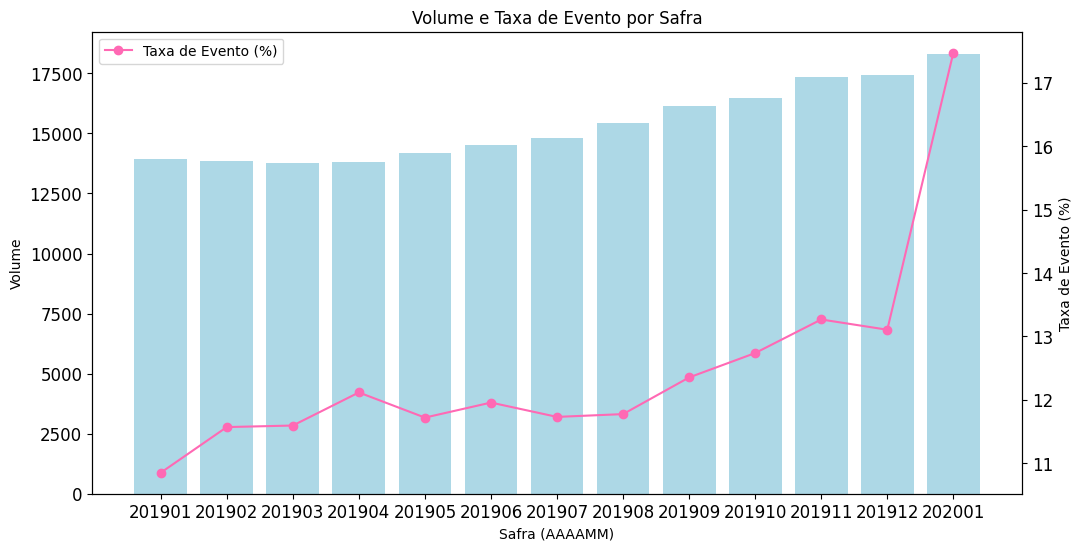

In [6]:
# Gráfico com barras para o volume e linha para a taxa de evento por safra (AAAAMM)
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'lightblue'  # Azul mais escuro
ax1.bar(resultado['Safra (AAAAMM)'], resultado['Volume'], color=color, label='Volume')
ax1.set_xlabel('Safra (AAAAMM)')
ax1.set_ylabel('Volume', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()  # Cria um segundo eixo y
color = 'hotpink'  # Rosa sólido
ax2.plot(resultado['Safra (AAAAMM)'], resultado['Taxa_de_Evento'] * 100, marker='o', linestyle='-', color=color, label='Taxa de Evento (%)')
ax2.set_ylabel('Taxa de Evento (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

for label in ax1.get_xticklabels() + ax1.get_yticklabels() + ax2.get_yticklabels():
    label.set_fontsize(12)  # Tamanho da fonte
    label.set_color('black')  # Cor sólida

plt.title('Volume e Taxa de Evento por Safra')
plt.legend(loc='upper left')
plt.show()


 Validação Cruzada tipo Holdout utilizando modo **out-of-time** (tempo linear)
- Vamos utilizar as safras de 201901 a 201907 para desenvolvimento
- Vamos utilizar as safras de 201908 a 202001 para validação do Modelo

In [7]:
# Filtrando a base de treino
abt_treino = abt_00[(abt_00['PK_DATREF'] >= '201901') & (abt_00['PK_DATREF'] <= '201907')]

# Filtrando a base de teste
abt_teste = abt_00[(abt_00['PK_DATREF'] >= '201908') & (abt_00['PK_DATREF'] <= '202001')]

abt_treino.shape,abt_teste.shape

((98875, 18), (101168, 18))

In [8]:
abt_treino.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6,PK_ID,PK_DATREF
4,184.36,1.0,184.36,1.0,1.000000,11,883.10,1.0,1.000000,0,1.0,99999.0,NaN,0.916667,0.0,0,2052325,201905
5,0.00,1.0,13.80,1.0,0.909091,11,0.00,1.0,0.833333,0,1.0,99999.0,NaN,0.833333,0.0,0,8344658,201903
6,142.72,1.0,142.72,1.0,1.000000,12,0.00,1.0,1.000000,0,1.0,99999.0,NaN,1.000000,0.0,0,20331932,201903
7,327.00,1.0,326.39,1.0,1.000000,5,1582.00,1.0,1.000000,0,1.0,99999.0,NaN,0.416667,0.0,0,19950320,201906
8,535.60,1.0,535.60,1.0,1.000000,3,66.66,1.0,1.000000,8,1.0,99999.0,NaN,0.916667,2.0,0,34268249,201907


In [9]:
### Vamos conferir se as volumetrias e taxas de evento permaneceram corretas

# Calcule a média do TARGET_60_6 e o volume por AAAAMM
resultado = abt_treino.groupby('PK_DATREF').agg({'TARGET_60_6': 'mean', 'PK_DATREF': 'count'}).rename(columns={'PK_DATREF': 'Volume'}).reset_index()
resultado.columns = ['Safra (AAAAMM)', 'Taxa_de_Evento', 'Volume']

# Exiba a tabela
resultado


,Safra (AAAAMM),Taxa_de_Evento,Volume
0,201901,0.108496,13936
1,201902,0.115696,13838
2,201903,0.115940,13783
3,201904,0.121157,13825
4,201905,0.117191,14182
5,201906,0.119561,14503
6,201907,0.117301,14808


In [10]:
# Calcule a média do TARGET_60_6 e o volume por AAAAMM
resultado = abt_teste.groupby('PK_DATREF').agg({'TARGET_60_6': 'mean', 'PK_DATREF': 'count'}).rename(columns={'PK_DATREF': 'Volume'}).reset_index()
resultado.columns = ['Safra (AAAAMM)', 'Taxa_de_Evento', 'Volume']

# Exiba a tabela
resultado

,Safra (AAAAMM),Taxa_de_Evento,Volume
0,201908,0.117742,15449
1,201909,0.123528,16134
2,201910,0.127373,16487
3,201911,0.132668,17344
4,201912,0.131051,17436
5,202001,0.174746,18318


# 3. Data preparation

In [12]:
# Gerar Metadados

# Análise das variáveis para tipos, nulos e cardinallidade
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe dados do banco
metadata_df = generate_metadata(abt_treino)
metadata_df

,nome_variavel,tipo,qt_nulos,cardinalidade
0,TARGET_60_6,int64,0,2
1,VAR_6,int64,0,10
2,PK_ID,int64,0,60705
3,VAR_10,int64,0,10
4,VAR_1,float64,0,54702
5,VAR_15,float64,2,13
6,VAR_14,float64,0,13
7,VAR_13,float64,55463,14
8,VAR_12,float64,0,10
9,VAR_11,float64,4,28935


#Substituir os valores nulos por média

<Axes: >

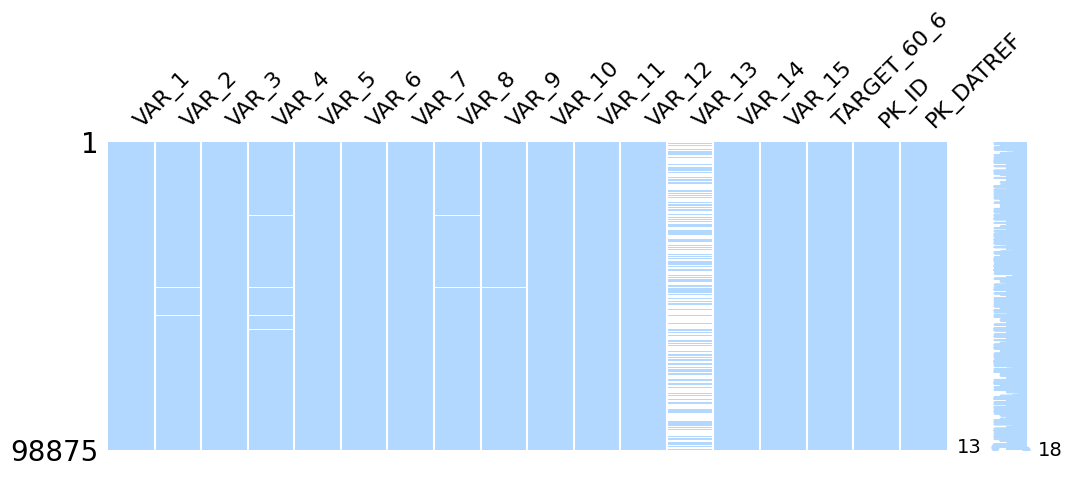

In [13]:
msno.matrix(abt_treino, color=(0.7, 0.85, 1), figsize=(12, 4))

In [16]:
abt_treino.drop(axis=1,columns=['TARGET_60_6','PK_DATREF','PK_ID'],inplace=True)

# Calcula a média dos valores não nulos no DataFrame de treino
media_treino = abt_treino.mean()

# Substitui os valores nulos pela média no DataFrame de treino
abt_treino = abt_treino.fillna(media_treino)

# Substitui os valores nulos no DataFrame de teste pela média calculada do treino
abt_teste = abt_teste.fillna(media_treino)


<Axes: >

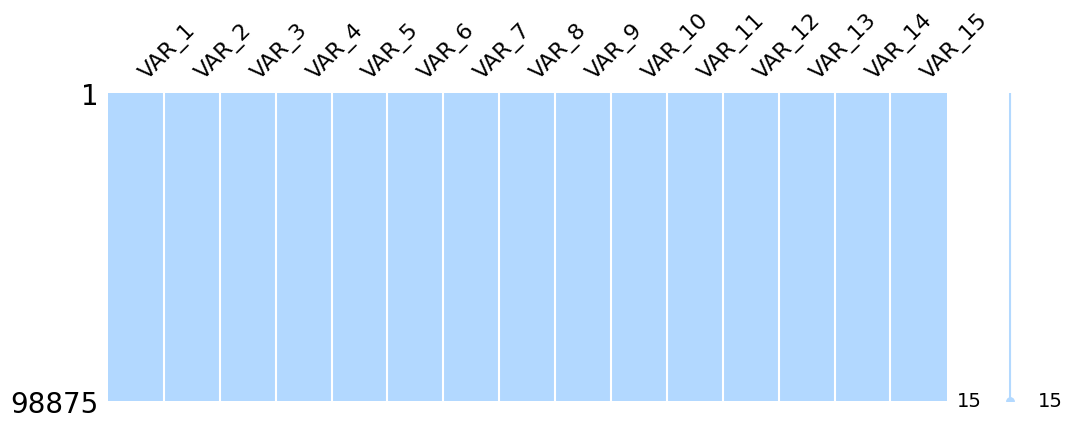

In [18]:
# Visualizando o mapa de missing usando missingno em tom azul
msno.matrix(abt_treino, color=(0.7, 0.85, 1), figsize=(12, 4))

In [19]:
abt_teste.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6,PK_ID,PK_DATREF
0,98.00,1.000000,97.49,1.000000,1.000000,12,0.00,1.000000,1.000000,0,1.000000,99999.0,3.000000,1.000000,6.0,0,4244165,201908
1,289.51,1.000000,289.51,1.000000,1.000000,12,1346.35,1.000000,1.000000,0,1.000000,99999.0,3.904566,1.000000,8.0,0,26237868,202001
2,106.16,1.000000,106.16,1.000000,0.833333,5,717.91,1.000000,0.833333,7,1.000000,99998.0,3.000000,0.833333,0.0,0,34125319,201908
3,1243.32,0.666667,1243.32,0.870769,0.583333,12,50.87,0.851072,0.500000,0,0.821816,99997.0,3.904566,0.583333,12.0,0,24360460,201912
12,721.20,1.000000,721.20,1.000000,1.000000,12,215.04,1.000000,1.000000,0,1.000000,99998.0,6.000000,1.000000,12.0,0,32525353,201909


In [20]:
# Gerar Metadados

# Análise das variáveis para tipos, nulos e cardinallidade
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe dados do banco
metadata_df = generate_metadata(abt_teste)
metadata_df

,nome_variavel,tipo,qt_nulos,cardinalidade
0,TARGET_60_6,int64,0,2
1,VAR_6,int64,0,10
2,PK_ID,int64,0,67176
3,VAR_10,int64,0,10
4,VAR_1,float64,0,57555
5,VAR_15,float64,0,14
6,VAR_14,float64,0,13
7,VAR_13,float64,0,16
8,VAR_12,float64,0,10
9,VAR_11,float64,0,28837


Trazendo o Target para as tabelas de treino e teste

In [21]:
abt_treino.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15
4,184.36,1.0,184.36,1.0,1.000000,11,883.10,1.0,1.000000,0,1.0,99999.0,3.904566,0.916667,0.0
5,0.00,1.0,13.80,1.0,0.909091,11,0.00,1.0,0.833333,0,1.0,99999.0,3.904566,0.833333,0.0
6,142.72,1.0,142.72,1.0,1.000000,12,0.00,1.0,1.000000,0,1.0,99999.0,3.904566,1.000000,0.0
7,327.00,1.0,326.39,1.0,1.000000,5,1582.00,1.0,1.000000,0,1.0,99999.0,3.904566,0.416667,0.0
8,535.60,1.0,535.60,1.0,1.000000,3,66.66,1.0,1.000000,8,1.0,99999.0,3.904566,0.916667,2.0


In [23]:
abt_train = abt_treino.merge(abt_00[['TARGET_60_6']], left_index=True, right_index=True, how='inner')
# abt_test = test_df.merge(abt_00[['TARGET_60_6']], left_index=True, right_index=True, how='inner')
abt_test = abt_teste.drop(axis=1,columns=['PK_ID','PK_DATREF'])
abt_train.shape,abt_test.shape

((98875, 16), (101168, 16))

In [24]:
abt_train.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6
4,184.36,1.0,184.36,1.0,1.000000,11,883.10,1.0,1.000000,0,1.0,99999.0,3.904566,0.916667,0.0,0
5,0.00,1.0,13.80,1.0,0.909091,11,0.00,1.0,0.833333,0,1.0,99999.0,3.904566,0.833333,0.0,0
6,142.72,1.0,142.72,1.0,1.000000,12,0.00,1.0,1.000000,0,1.0,99999.0,3.904566,1.000000,0.0,0
7,327.00,1.0,326.39,1.0,1.000000,5,1582.00,1.0,1.000000,0,1.0,99999.0,3.904566,0.416667,0.0,0
8,535.60,1.0,535.60,1.0,1.000000,3,66.66,1.0,1.000000,8,1.0,99999.0,3.904566,0.916667,2.0,0


In [25]:
abt_test.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6
0,98.00,1.000000,97.49,1.000000,1.000000,12,0.00,1.000000,1.000000,0,1.000000,99999.0,3.000000,1.000000,6.0,0
1,289.51,1.000000,289.51,1.000000,1.000000,12,1346.35,1.000000,1.000000,0,1.000000,99999.0,3.904566,1.000000,8.0,0
2,106.16,1.000000,106.16,1.000000,0.833333,5,717.91,1.000000,0.833333,7,1.000000,99998.0,3.000000,0.833333,0.0,0
3,1243.32,0.666667,1243.32,0.870769,0.583333,12,50.87,0.851072,0.500000,0,0.821816,99997.0,3.904566,0.583333,12.0,0
12,721.20,1.000000,721.20,1.000000,1.000000,12,215.04,1.000000,1.000000,0,1.000000,99998.0,6.000000,1.000000,12.0,0


# Seleção de Variáveis

Seleção de variáveis através do Gradient Boosting

In [26]:
X = abt_train.drop(axis=1,columns='TARGET_60_6')
y = abt_train.TARGET_60_6

# Treinar modelo com algoritmo Random Forest
clf = GradientBoostingClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

GradientBoostingClassifier()

Número de features selecionadas:  8


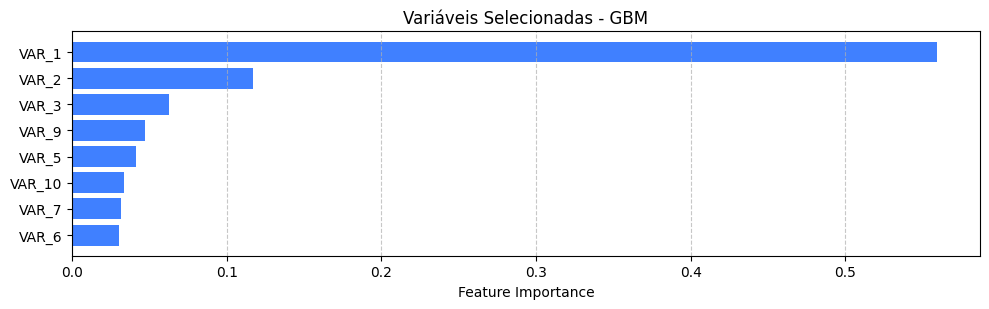

In [27]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.05

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - GBM")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 Lista de variáveis selecionadas pelo GBM

In [28]:
list(selected_features_df.Feature)

['VAR_6', 'VAR_7', 'VAR_10', 'VAR_5', 'VAR_9', 'VAR_3', 'VAR_2', 'VAR_1']

Gerar ABT filtrada - pós Seleção de Variáveis

In [29]:
abt_train_fs01 = abt_train[list(selected_features_df.Feature)+['TARGET_60_6']]
abt_test_fs01 = abt_test[list(selected_features_df.Feature)+['TARGET_60_6']]

In [30]:
abt_test_fs01.head()

,VAR_6,VAR_7,VAR_10,VAR_5,VAR_9,VAR_3,VAR_2,VAR_1,TARGET_60_6
0,12,0.00,0,1.000000,1.000000,97.49,1.000000,98.00,0
1,12,1346.35,0,1.000000,1.000000,289.51,1.000000,289.51,0
2,5,717.91,7,0.833333,0.833333,106.16,1.000000,106.16,0
3,12,50.87,0,0.583333,0.500000,1243.32,0.666667,1243.32,0
12,12,215.04,0,1.000000,1.000000,721.20,1.000000,721.20,0


In [31]:
abt_train_fs01.head()

,VAR_6,VAR_7,VAR_10,VAR_5,VAR_9,VAR_3,VAR_2,VAR_1,TARGET_60_6
4,11,883.10,0,1.000000,1.000000,184.36,1.0,184.36,0
5,11,0.00,0,0.909091,0.833333,13.80,1.0,0.00,0
6,12,0.00,0,1.000000,1.000000,142.72,1.0,142.72,0
7,5,1582.00,0,1.000000,1.000000,326.39,1.0,327.00,0
8,3,66.66,8,1.000000,1.000000,535.60,1.0,535.60,0


Mapa de correlação de Pearson para as variáveis selecionadas

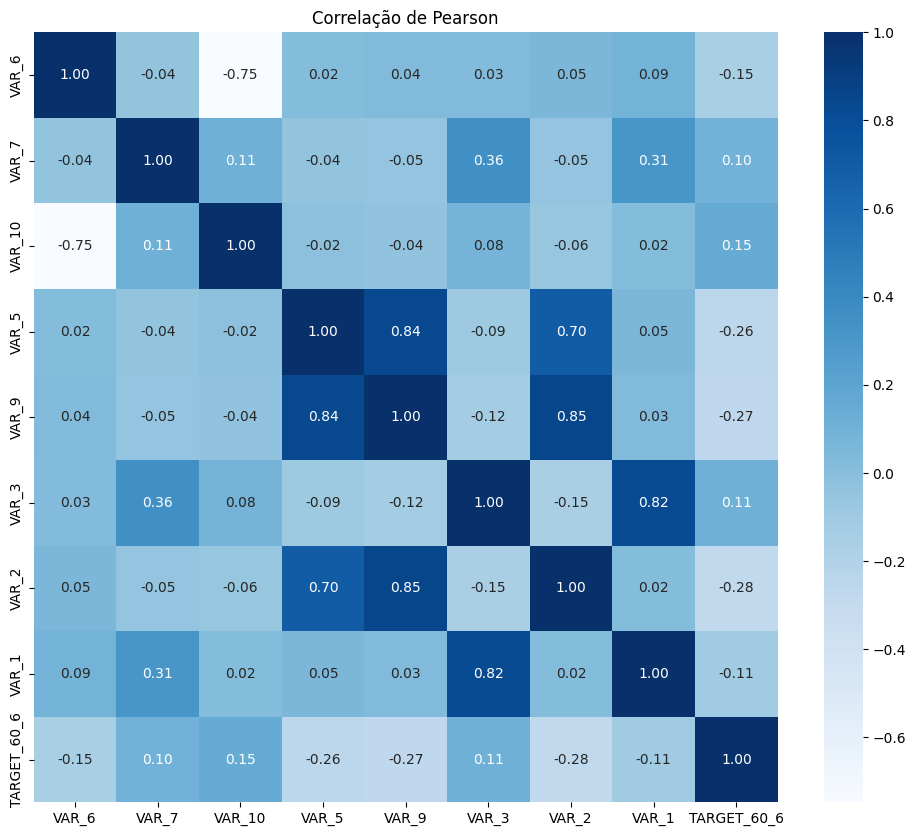

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a correlação de Pearson
corr_matrix = abt_train_fs01.corr()

# Plotar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlação de Pearson")
plt.show()

In [33]:
list(selected_features_df.Feature)

['VAR_6', 'VAR_7', 'VAR_10', 'VAR_5', 'VAR_9', 'VAR_3', 'VAR_2', 'VAR_1']

In [34]:
list(selected_features_df.Feature)+['TARGET_60_6']
lista_1 = ['TARGET_60_6','VAR_6', 'VAR_7','VAR_10', 'VAR_5' ]

lista_2 = ['TARGET_60_6','VAR_9', 'VAR_3', 'VAR_2', 'VAR_1' ]

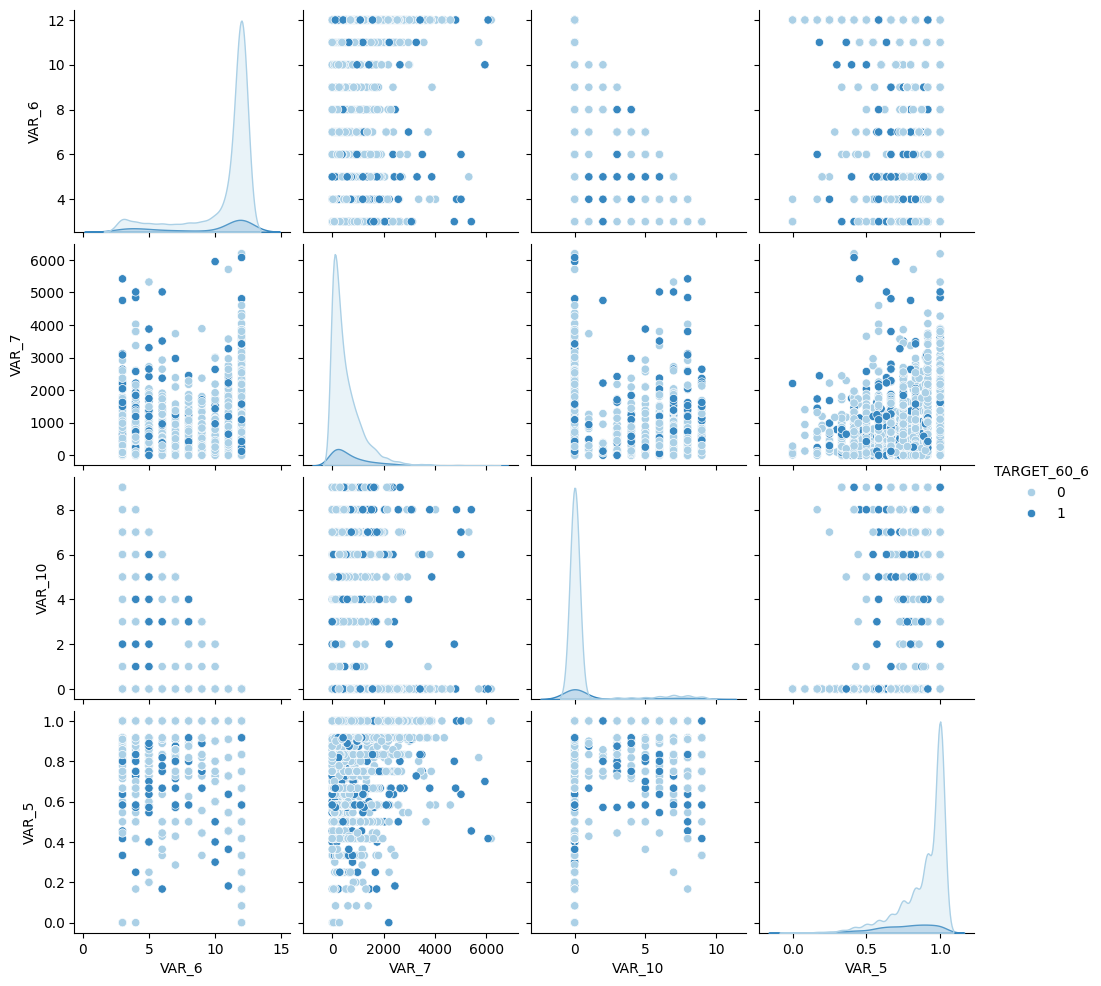

In [35]:
# Gerar o pairplot incluindo o target como hue

# Gerar uma amostra para otimizar o tempo de processamento
abt_corr_aux_sample = abt_train_fs01.sample(n=5000)
sns.pairplot(abt_corr_aux_sample[lista_1], hue='TARGET_60_6', palette='Blues')
plt.show()

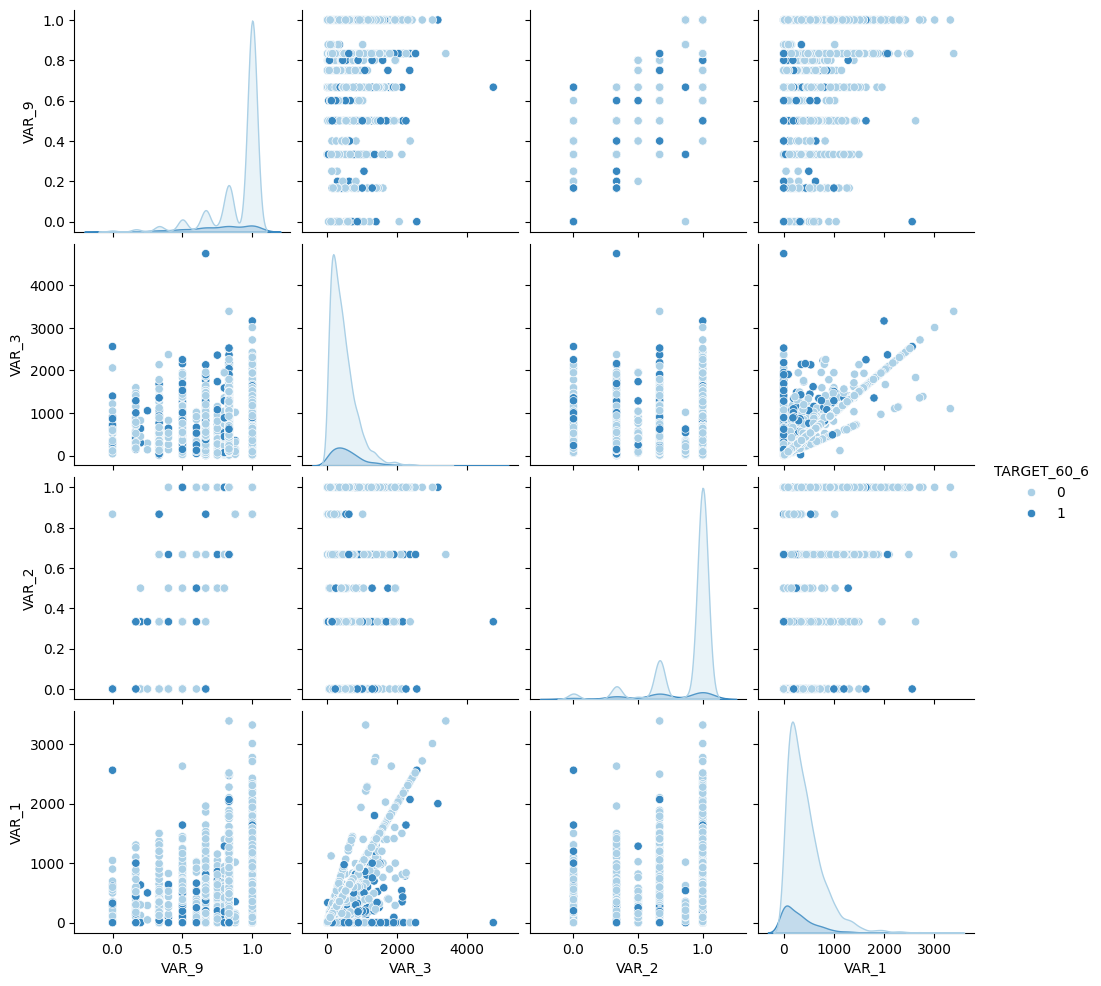

In [37]:
# Gerar o pairplot incluindo o target como hue

# Gerar uma amostra para otimizar o tempo de processamento
abt_corr_aux_sample = abt_train_fs01.sample(n=5000)
sns.pairplot(abt_corr_aux_sample[lista_2], hue='TARGET_60_6', palette='Blues')
plt.show()

Verificando força das variáveis explicativas com IV

In [39]:
import pandas as pd
import numpy as np

def calculate_woe_iv(df, feature, target):
    """
    Calcula WOE (Weight of Evidence) e IV (Information Value) para uma variável.
    """
    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 1)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 0)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    return iv

def iv_table(df, target):
    """
    Retorna uma tabela com IV para todas as variáveis em relação ao target.
    """
    iv_list = []
    for col in df.columns:
        if col == target:
            continue
        iv = calculate_woe_iv(df, col, target)
        if iv < 0.02:
            predictiveness = 'Inútil para a predição'
        elif iv < 0.1:
            predictiveness = 'Preditor Fraco'
        elif iv < 0.3:
            predictiveness = 'Preditor Moderado'
        else:
            predictiveness = 'Preditor Forte'
        iv_list.append({
            'Variável': col,
            'IV': iv,
            'Preditividade': predictiveness
        })

    return pd.DataFrame(iv_list).sort_values(by='IV', ascending=False)

# Exemplo de uso:
iv_df = iv_table(abt_corr_aux_sample, 'TARGET_60_6')
iv_df

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variável,IV,Preditividade
7,VAR_1,0.655185,Preditor Forte
4,VAR_9,0.651102,Preditor Forte
6,VAR_2,0.602397,Preditor Forte
3,VAR_5,0.571093,Preditor Forte
2,VAR_10,0.175666,Preditor Moderado
0,VAR_6,0.172085,Preditor Moderado
5,VAR_3,0.071288,Preditor Fraco
1,VAR_7,0.070729,Preditor Fraco


# Variáveis Explicativas - Linearidade com Log(Odds)

In [40]:
abt_train_fs01.head()

,VAR_6,VAR_7,VAR_10,VAR_5,VAR_9,VAR_3,VAR_2,VAR_1,TARGET_60_6
4,11,883.10,0,1.000000,1.000000,184.36,1.0,184.36,0
5,11,0.00,0,0.909091,0.833333,13.80,1.0,0.00,0
6,12,0.00,0,1.000000,1.000000,142.72,1.0,142.72,0
7,5,1582.00,0,1.000000,1.000000,326.39,1.0,327.00,0
8,3,66.66,8,1.000000,1.000000,535.60,1.0,535.60,0


In [41]:
list(selected_features_df.Feature)

['VAR_6', 'VAR_7', 'VAR_10', 'VAR_5', 'VAR_9', 'VAR_3', 'VAR_2', 'VAR_1']

<ipython-input-42-0f9afe2f0cb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')


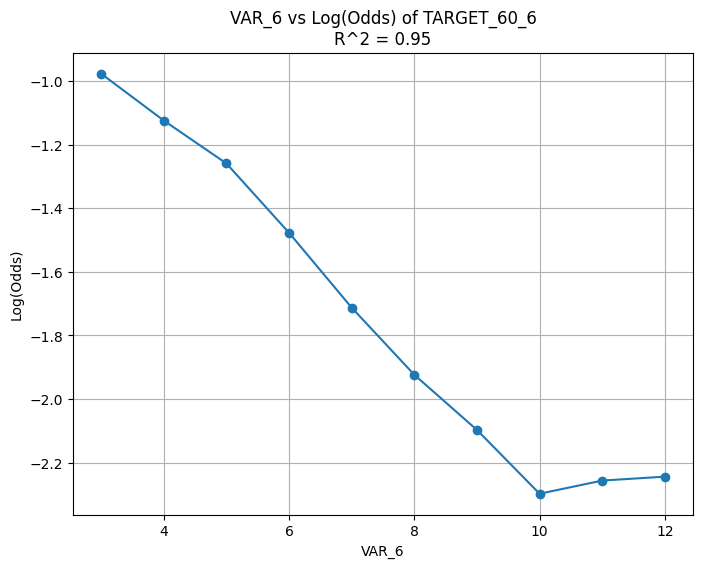

<ipython-input-42-0f9afe2f0cb1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bin', axis=1, inplace=True)
<ipython-input-42-0f9afe2f0cb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


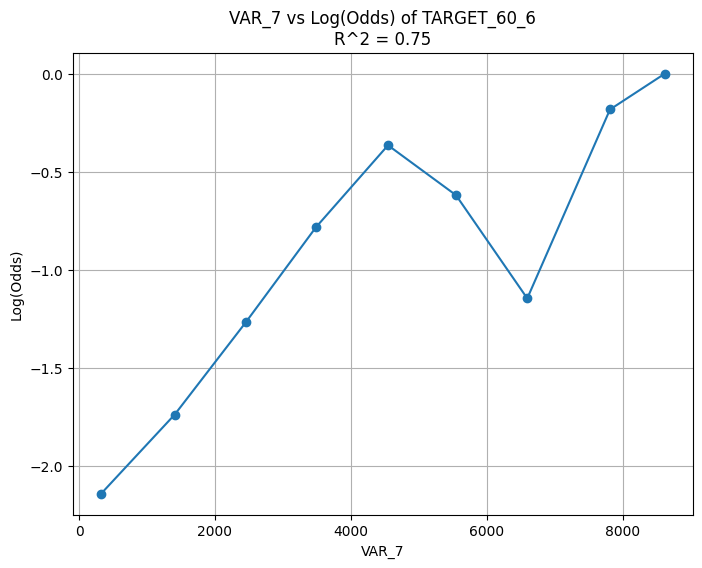

<ipython-input-42-0f9afe2f0cb1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bin', axis=1, inplace=True)
<ipython-input-42-0f9afe2f0cb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')


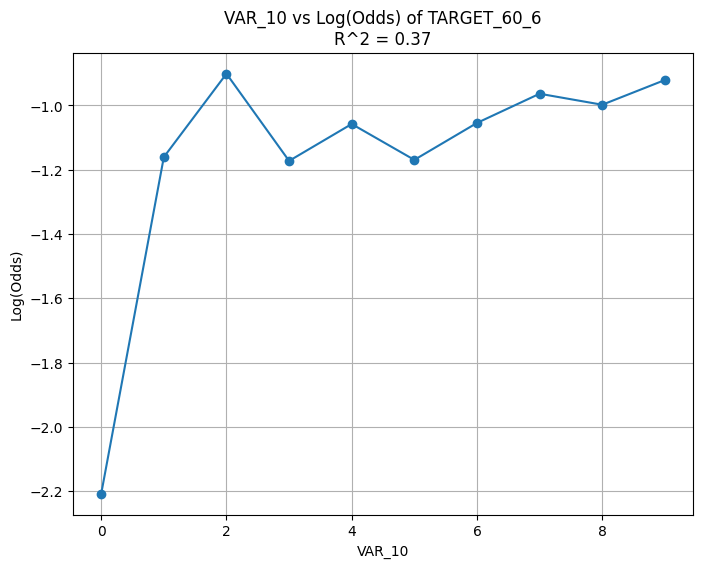

<ipython-input-42-0f9afe2f0cb1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bin', axis=1, inplace=True)
<ipython-input-42-0f9afe2f0cb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')


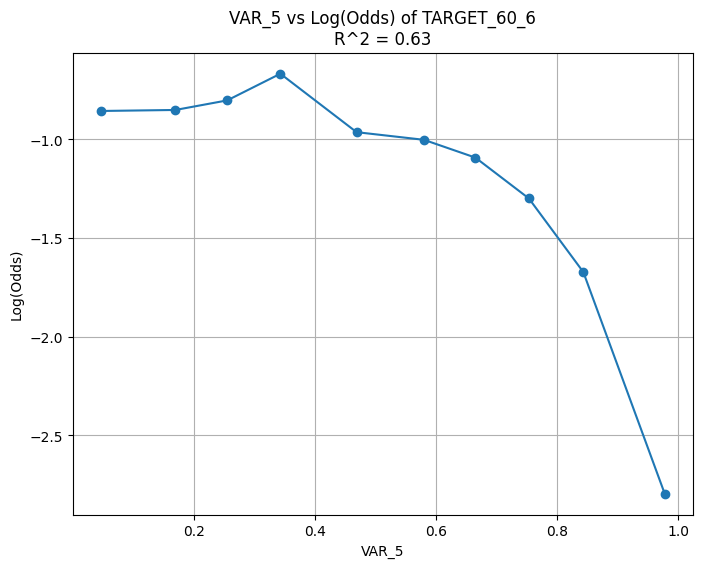

<ipython-input-42-0f9afe2f0cb1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bin', axis=1, inplace=True)
<ipython-input-42-0f9afe2f0cb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')


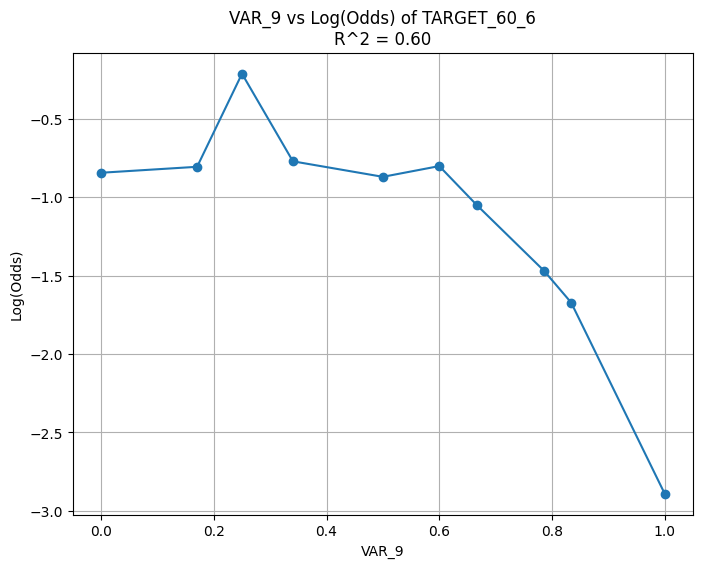

<ipython-input-42-0f9afe2f0cb1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bin', axis=1, inplace=True)
<ipython-input-42-0f9afe2f0cb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


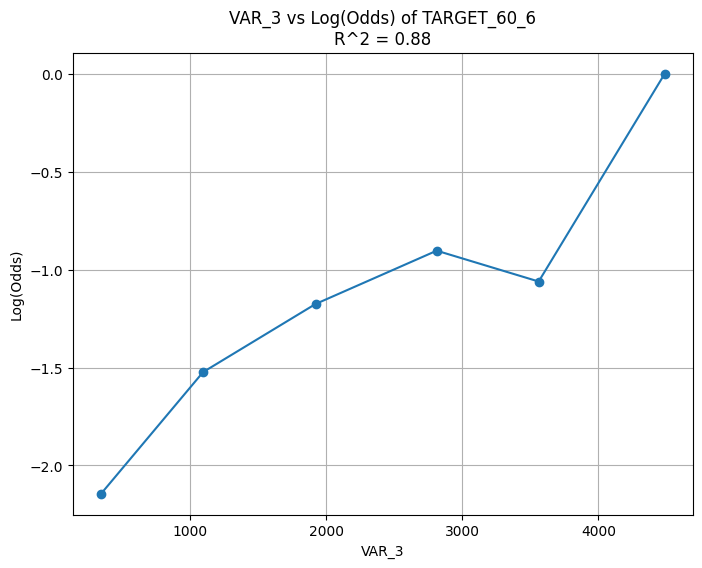

<ipython-input-42-0f9afe2f0cb1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bin', axis=1, inplace=True)
<ipython-input-42-0f9afe2f0cb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')


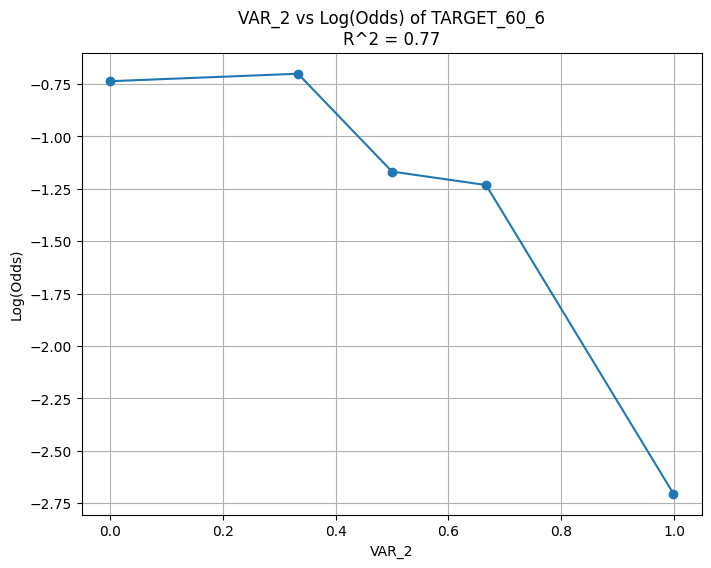

<ipython-input-42-0f9afe2f0cb1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bin', axis=1, inplace=True)
<ipython-input-42-0f9afe2f0cb1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


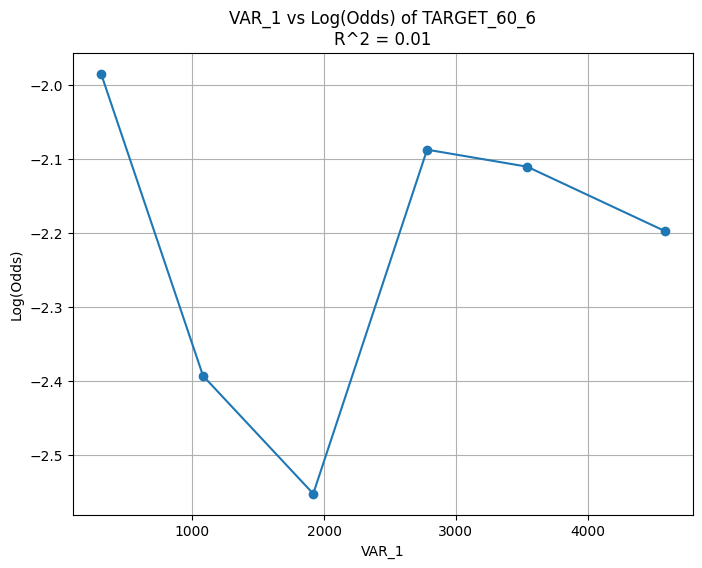

<ipython-input-42-0f9afe2f0cb1>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('bin', axis=1, inplace=True)


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_variable_vs_logodds(df, variables, target):
    for variable in variables:
        # Verificando o número de valores únicos
        unique_vals = df[variable].nunique()
        if unique_vals == 1:
            print(f"{variable} tem apenas um valor único. Ignorando...")
            continue

        n_bins = min(10, unique_vals)

        # Criando bins para a variável
        df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')

        # Calculando a proporção de eventos positivos para cada bin
        mean_target = df.groupby('bin')[target].mean()

        # Calculando o log(odds) e tratando valores infinitos
        log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

        # Calculando R^2
        X = df.groupby('bin')[variable].mean()[log_odds.index].values.reshape(-1, 1)
        y = log_odds.values
        model = LinearRegression().fit(X, y)
        r2 = model.score(X, y)

        # Plotando
        plt.figure(figsize=(8, 6))
        plt.plot(X, y, marker='o')
        plt.xlabel(variable)
        plt.ylabel('Log(Odds)')
        plt.title(f'{variable} vs Log(Odds) of {target}\nR^2 = {r2:.2f}')
        plt.grid(True)
        plt.show()

        # Removendo a coluna bin
        df.drop('bin', axis=1, inplace=True)

plot_variable_vs_logodds(abt_train_fs01, list(selected_features_df.Feature),'TARGET_60_6')

In [43]:
def calculate_r2_for_logodds(df, variables, target, threshold):
    results = []

    for variable in variables:
        # Verificando o número de valores únicos
        unique_vals = df[variable].nunique()
        if unique_vals == 1:
            print(f"{variable} tem apenas um valor único. Ignorando...")
            continue

        n_bins = min(10, unique_vals)

        # Criando bins para a variável
        df['bin'] = pd.cut(df[variable], bins=n_bins, labels=False, duplicates='drop')

        # Calculando a proporção de eventos positivos para cada bin
        mean_target = df.groupby('bin')[target].mean()

        # Calculando o log(odds) e tratando valores infinitos
        log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

        # Calculando R^2
        X = df.groupby('bin')[variable].mean()[log_odds.index].values.reshape(-1, 1)
        y = log_odds.values
        model = LinearRegression().fit(X, y)
        r2 = model.score(X, y)

        # Decidindo sobre a engenharia de recursos com base no valor de R^2 e no threshold fornecido
        feat_eng = "Usar como contínua" if r2 > threshold else "Categorizar"

        results.append({
            'Variable': variable,
            'R^2': r2,
            'Feat Eng': feat_eng
        })

        # Removendo a coluna bin
        df.drop('bin', axis=1, inplace=True)

    return pd.DataFrame(results)

r2_df = calculate_r2_for_logodds(abt_train, list(selected_features_df.Feature), 'TARGET_60_6',threshold=0.85)
r2_df

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,R^2,Feat Eng
0,VAR_6,0.950121,Usar como contínua
1,VAR_7,0.752678,Categorizar
2,VAR_10,0.370714,Categorizar
3,VAR_5,0.629112,Categorizar
4,VAR_9,0.604871,Categorizar
5,VAR_3,0.876130,Usar como contínua
6,VAR_2,0.774296,Categorizar
7,VAR_1,0.005191,Categorizar


In [44]:
abt_train[list(selected_features_df.Feature)].head()

,VAR_6,VAR_7,VAR_10,VAR_5,VAR_9,VAR_3,VAR_2,VAR_1
4,11,883.10,0,1.000000,1.000000,184.36,1.0,184.36
5,11,0.00,0,0.909091,0.833333,13.80,1.0,0.00
6,12,0.00,0,1.000000,1.000000,142.72,1.0,142.72
7,5,1582.00,0,1.000000,1.000000,326.39,1.0,327.00
8,3,66.66,8,1.000000,1.000000,535.60,1.0,535.60


<Axes: >

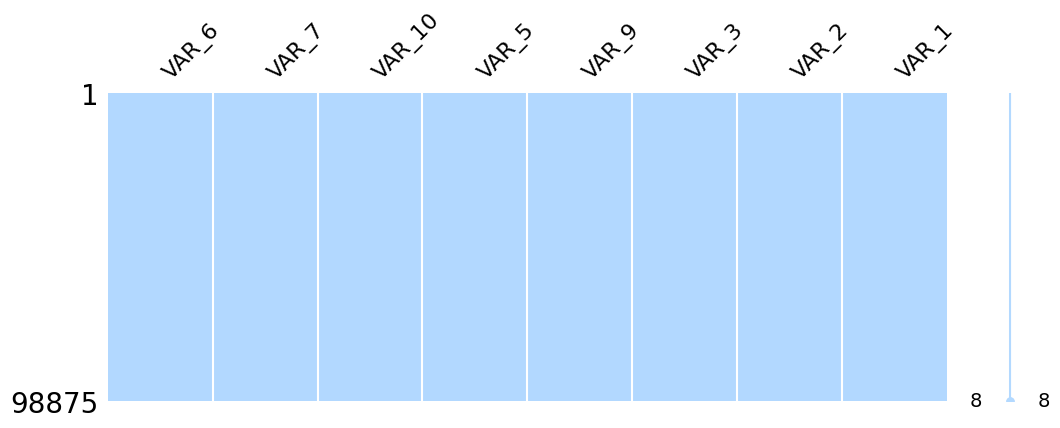

In [45]:
# Visualizando o mapa de missing usando missingno em tom azul
msno.matrix(abt_train[list(selected_features_df.Feature)], color=(0.7, 0.85, 1), figsize=(12, 4))

# lista de variaveis marcadas para serem categorizadas
Vamos verificar se existe alguma transformação que permita que elas sejam utilizadas de forma contínua na Regressão Logística

In [46]:
categorize_vars = r2_df[r2_df['Feat Eng'] == 'Categorizar']['Variable'].tolist()
categorize_vars

['VAR_7', 'VAR_10', 'VAR_5', 'VAR_9', 'VAR_2', 'VAR_1']

Verificar se existe alguma transformação que é capaz de tornar as variaveis lineares com log da odds

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def calculate_r2_for_logodds_and_transformations(df, variables, target, threshold):
    results = []

    transformations = {
        'Log': lambda x: np.log(x + 1),  # Adicionamos 1 para evitar log(0)
        'Quadratic': lambda x: x**2,
        'Square Root': lambda x: np.sqrt(x),
        'Reciprocal': lambda x: 1 / (x + 1)  # Adicionamos 1 para evitar divisão por zero
    }

    for variable in variables:
        best_transform_r2 = -np.inf
        best_transform_name = 'None'
        best_transform_function = None

        for transform_name, transform_function in transformations.items():
            transformed_var = transform_function(df[variable])

            # Verificando o número de valores únicos
            unique_vals = transformed_var.nunique()
            if unique_vals == 1:
                continue

            n_bins = min(10, unique_vals)

            # Criando bins para a variável transformada
            df['bin'] = pd.cut(transformed_var, bins=n_bins, labels=False, duplicates='drop')

            # Calculando a proporção de eventos positivos para cada bin
            mean_target = df.groupby('bin')[target].mean()

            # Calculando o log(odds) e tratando valores infinitos
            log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

            # Calculando R^2
            X = df.groupby('bin')[transformed_var.name].mean()[log_odds.index].values.reshape(-1, 1)
            y = log_odds.values
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)

            # Se essa transformação for a melhor até agora, atualize as melhores variáveis
            if r2 > best_transform_r2:
                best_transform_r2 = r2
                best_transform_name = transform_name
                best_transform_function = transform_function

            # Removendo a coluna bin
            df.drop('bin', axis=1, inplace=True)

        feat_eng = "Usar como contínua" if best_transform_r2 > threshold else "Categorizar"

        results.append({
            'Variable': variable,
            'Best Transformation': best_transform_name,
            'R^2 of Transformation': best_transform_r2,
            'Feat Eng': feat_eng,
            'Transformation Equation': f'{best_transform_name}({variable})'
        })

    return pd.DataFrame(results)

results_df = calculate_r2_for_logodds_and_transformations(abt_train, categorize_vars, 'TARGET_60_6', threshold=0.8)
results_df


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Variable,Best Transformation,R^2 of Transformation,Feat Eng,Transformation Equation
0,VAR_7,Log,0.904997,Usar como contínua,Log(VAR_7)
1,VAR_10,Quadratic,0.781574,Categorizar,Quadratic(VAR_10)
2,VAR_5,Quadratic,0.702162,Categorizar,Quadratic(VAR_5)
3,VAR_9,Quadratic,0.673376,Categorizar,Quadratic(VAR_9)
4,VAR_2,Quadratic,0.906911,Usar como contínua,Quadratic(VAR_2)
5,VAR_1,Reciprocal,0.454067,Categorizar,Reciprocal(VAR_1)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


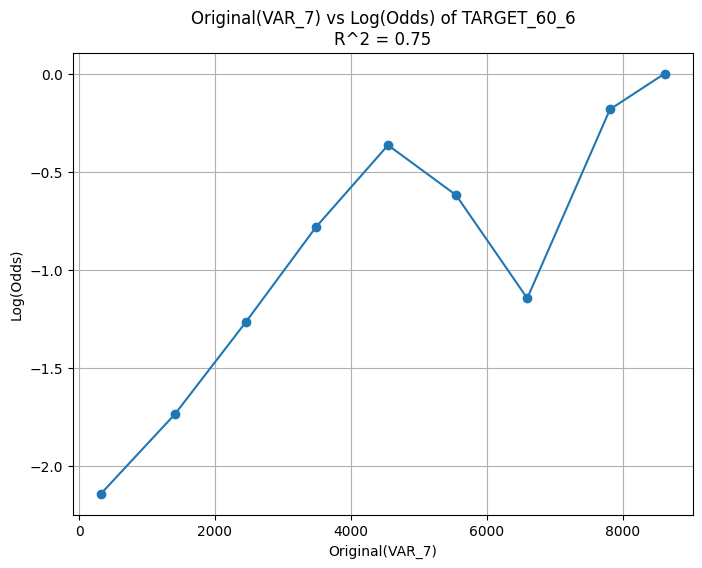

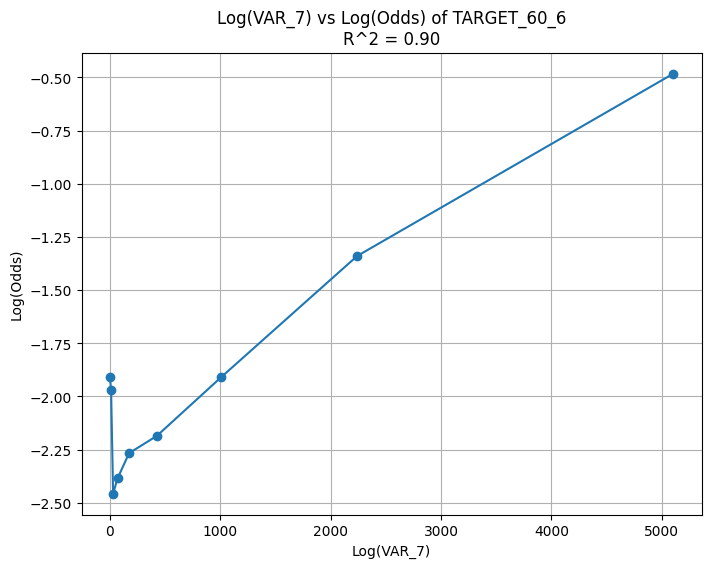

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


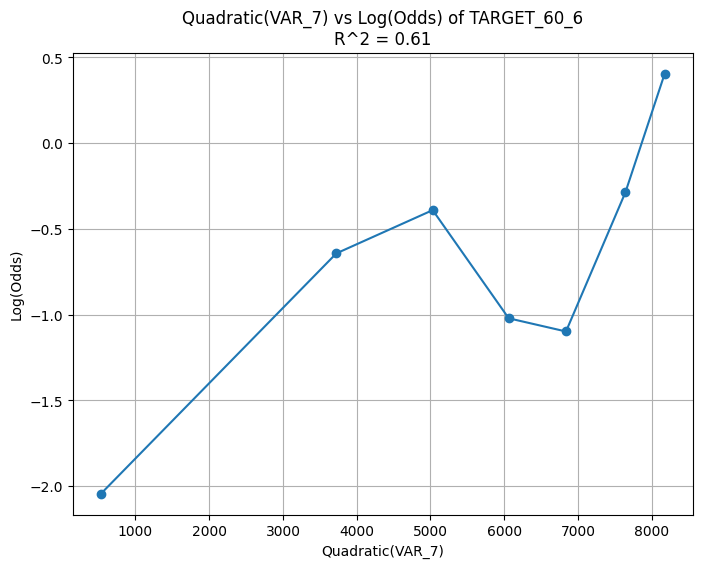

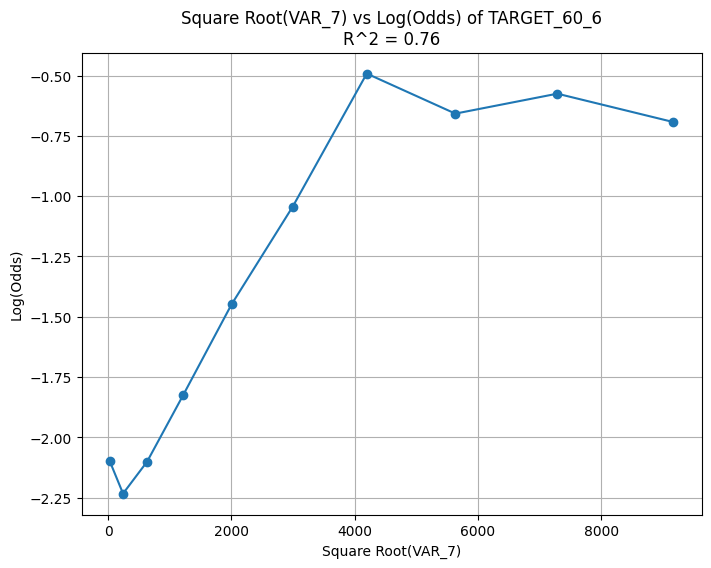

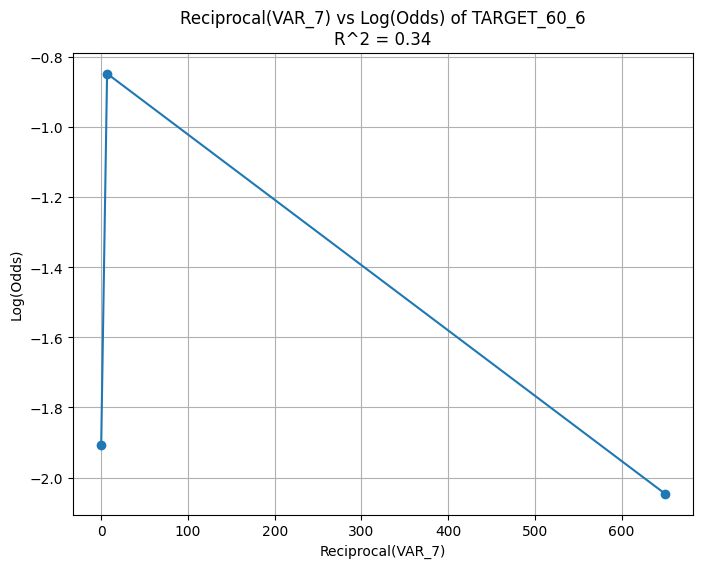

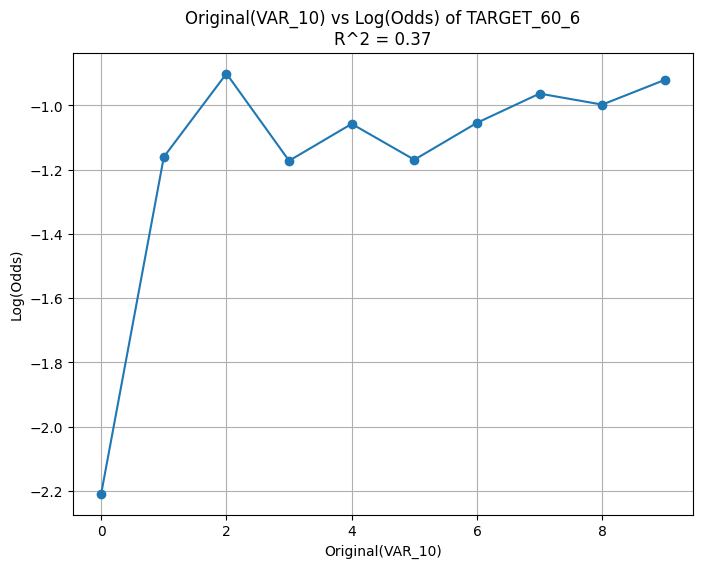

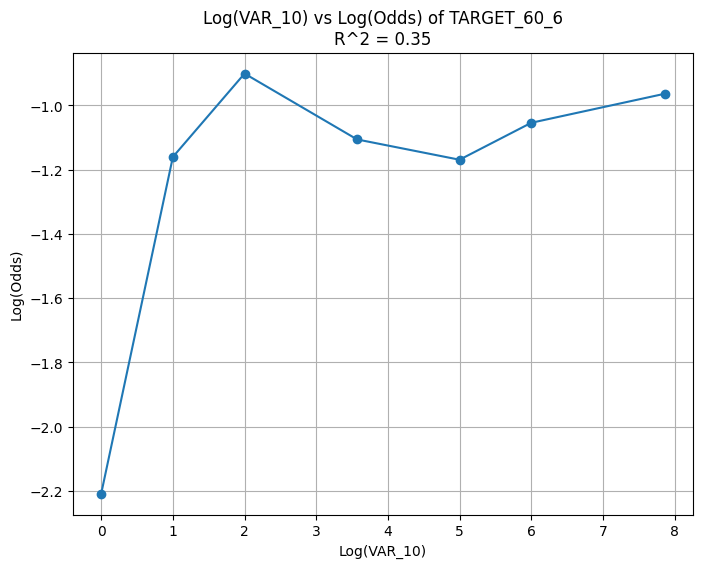

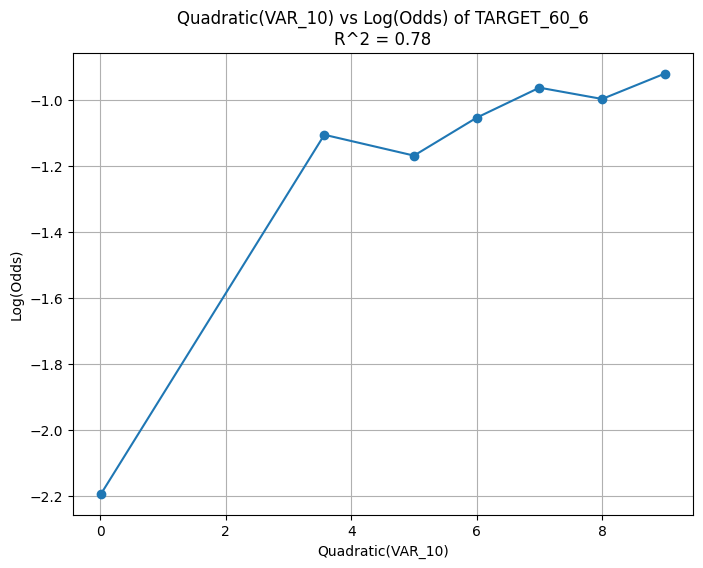

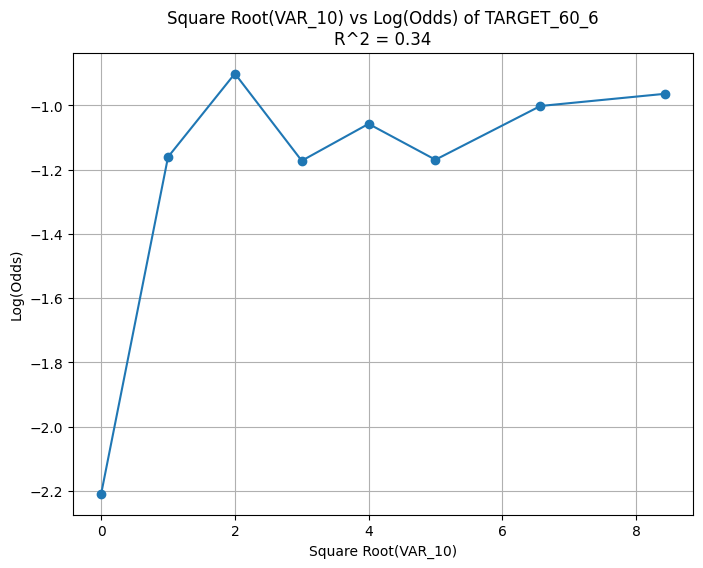

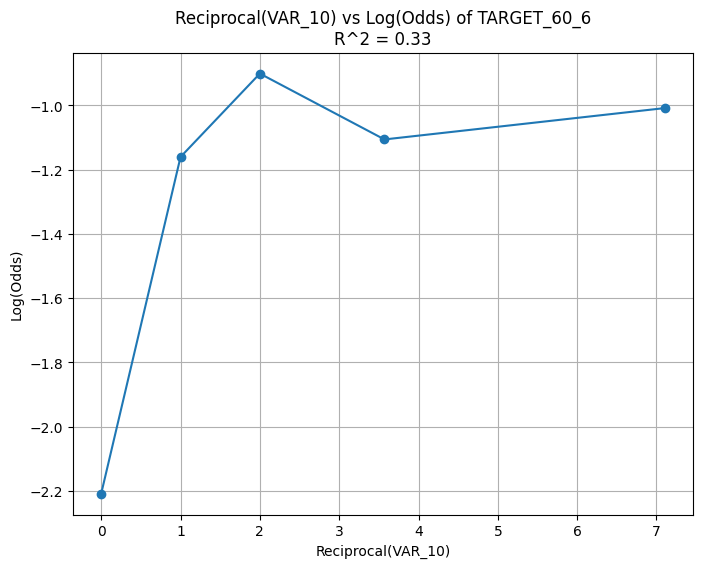

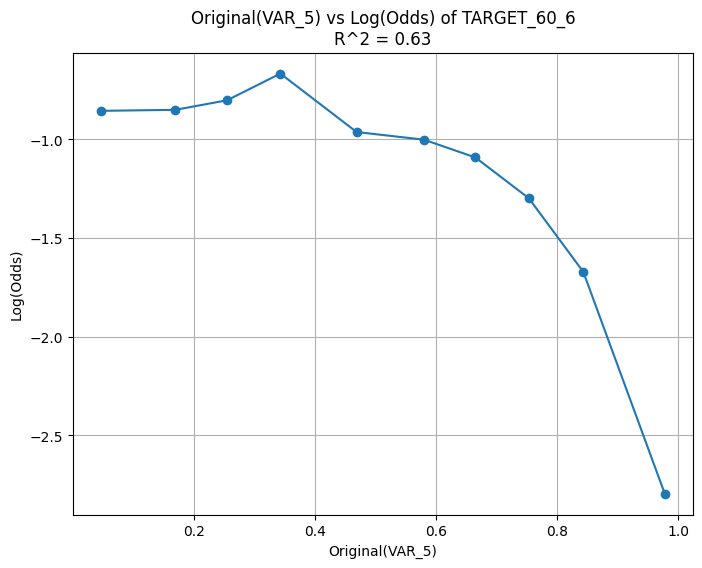

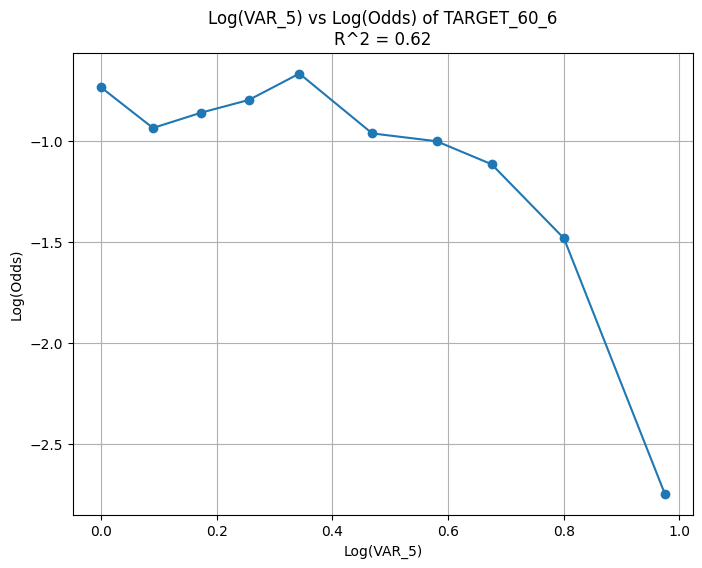

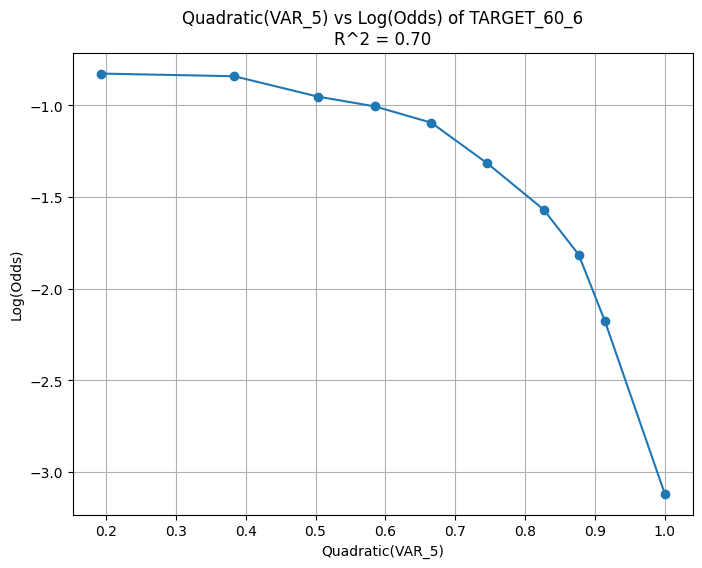

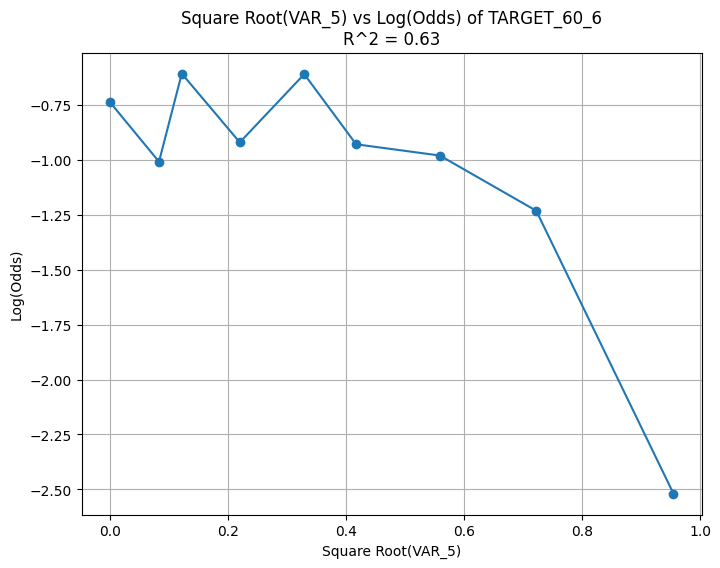

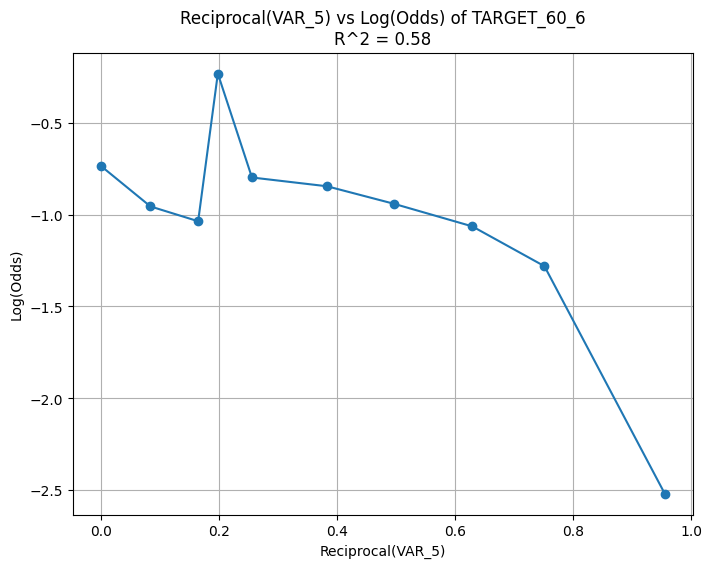

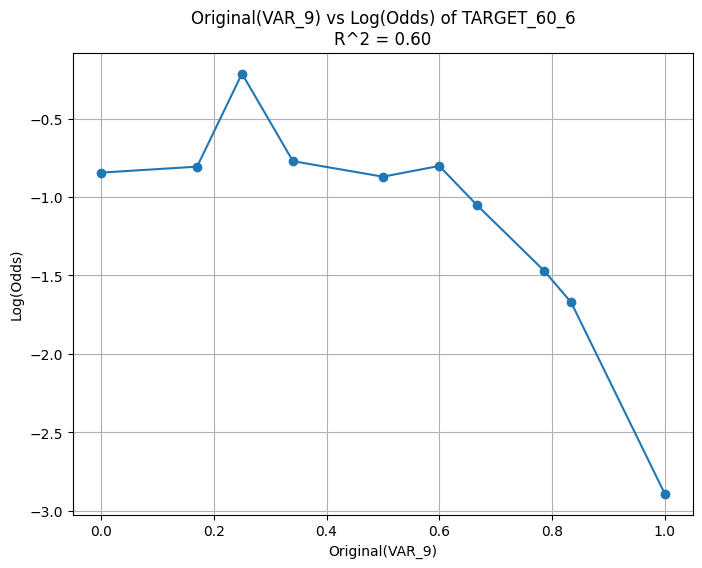

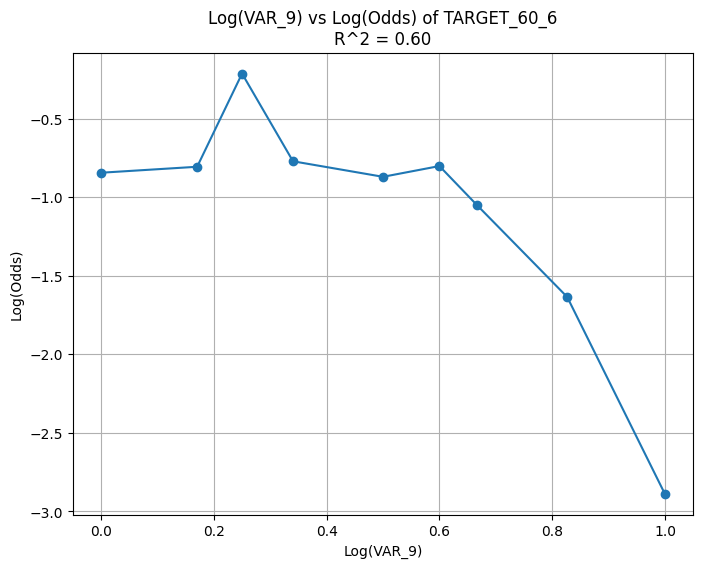

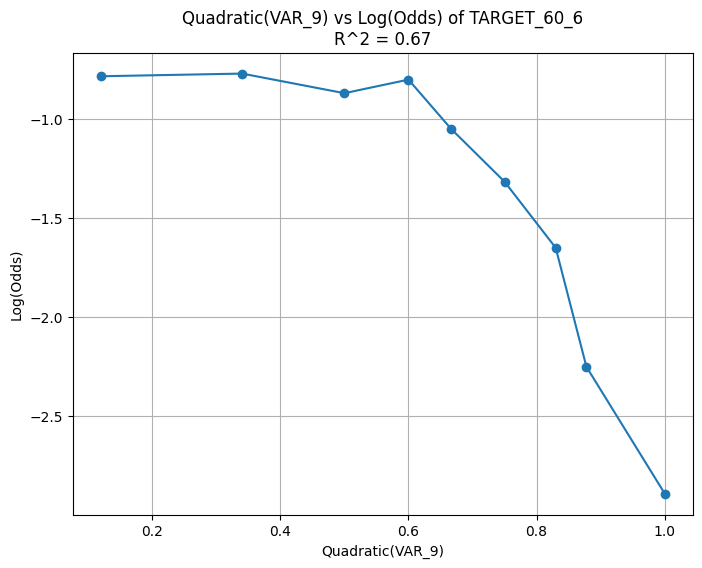

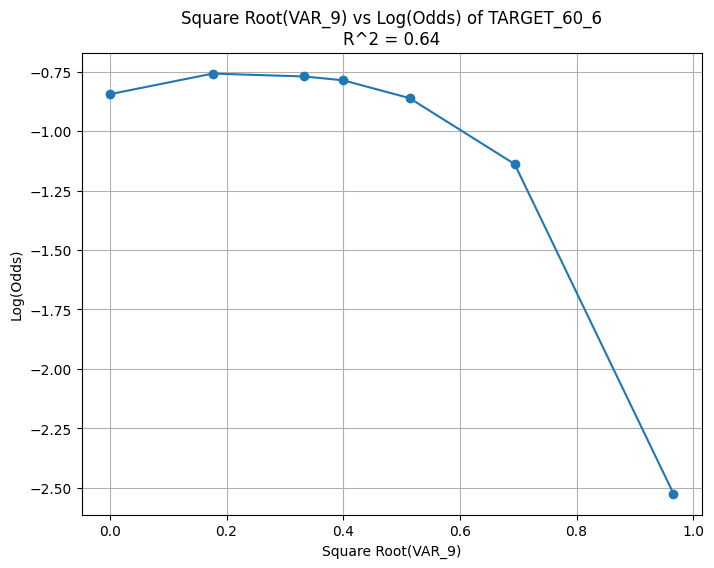

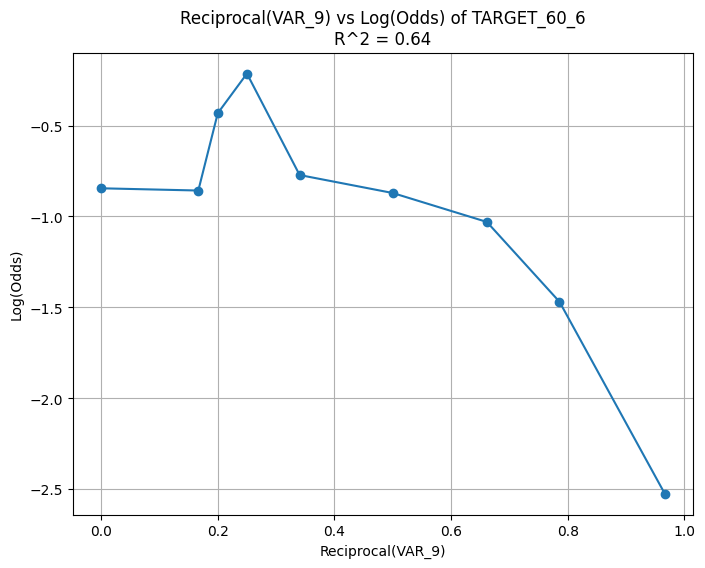

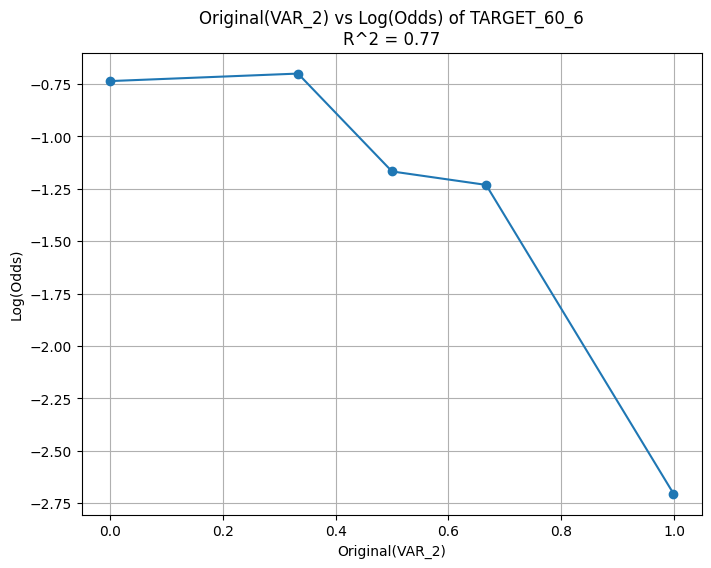

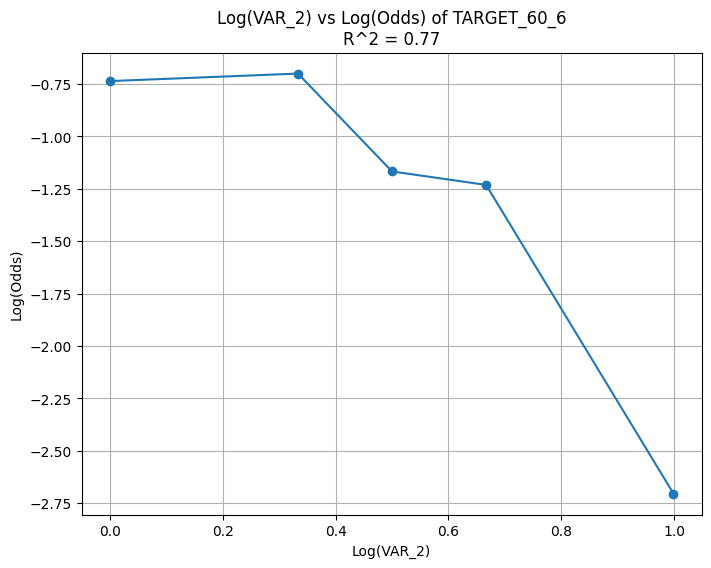

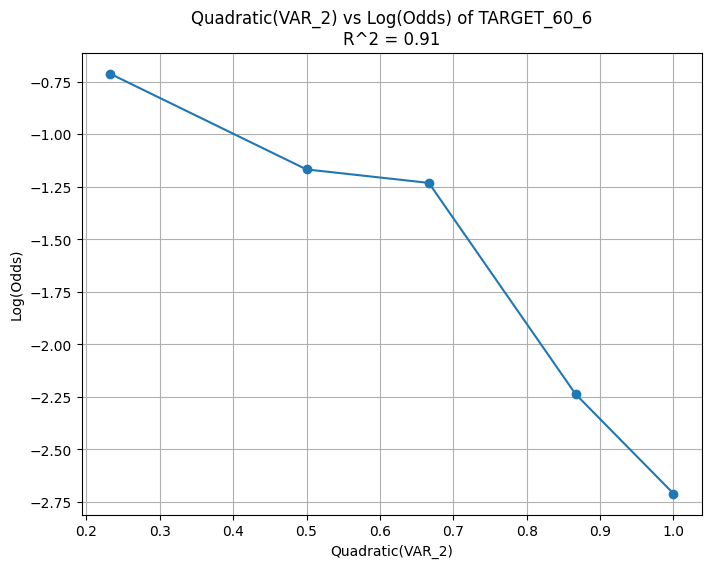

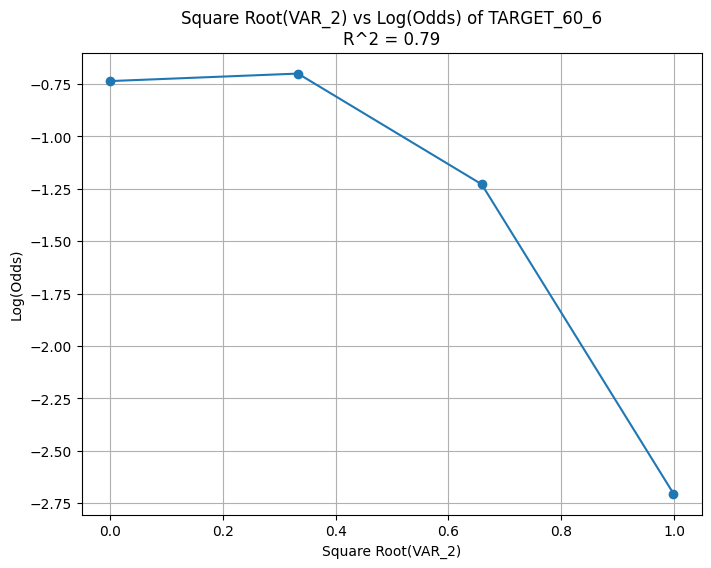

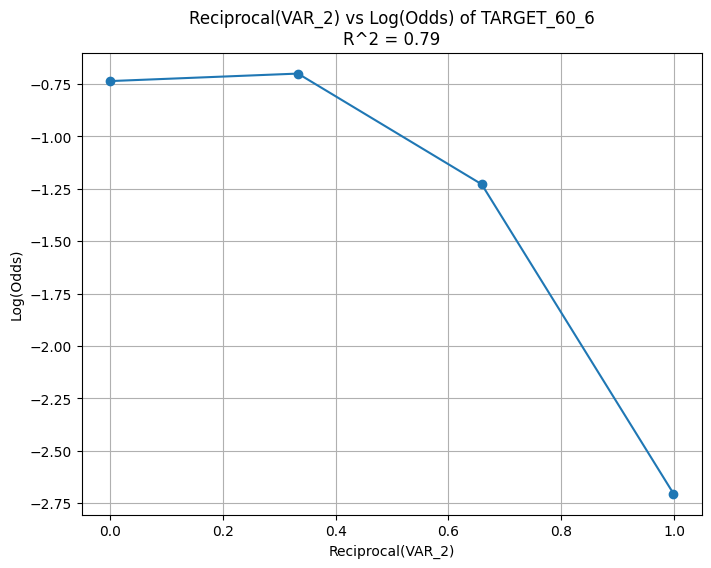

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


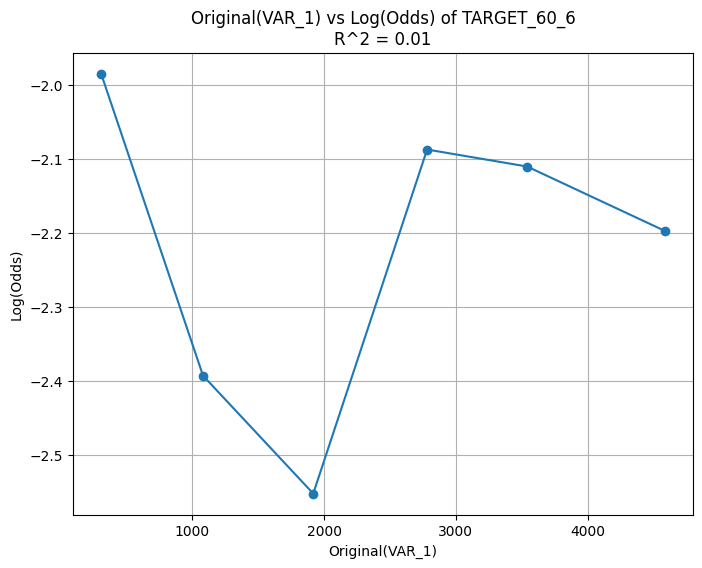

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


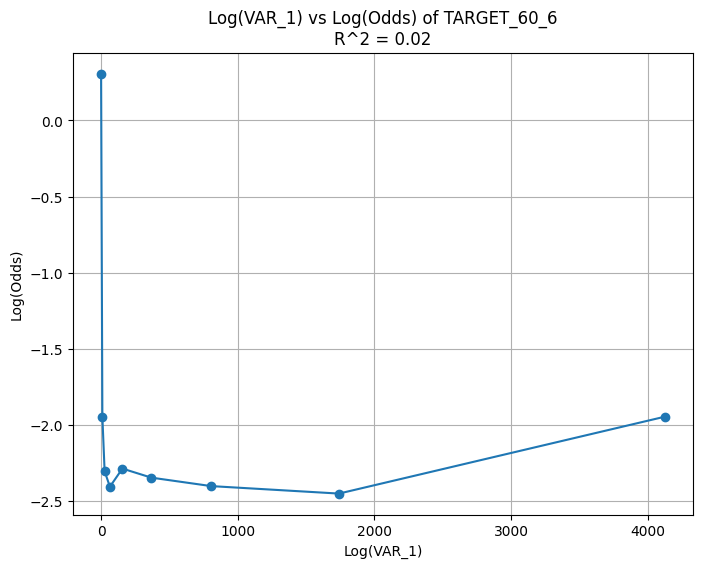

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


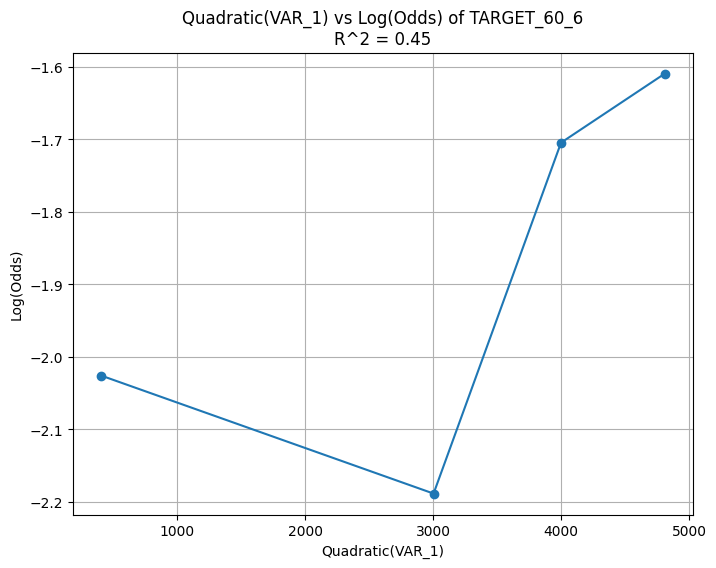

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


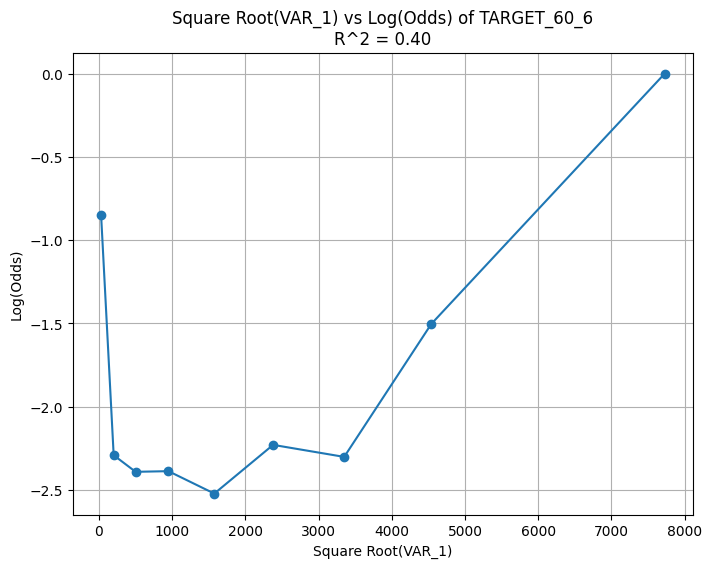

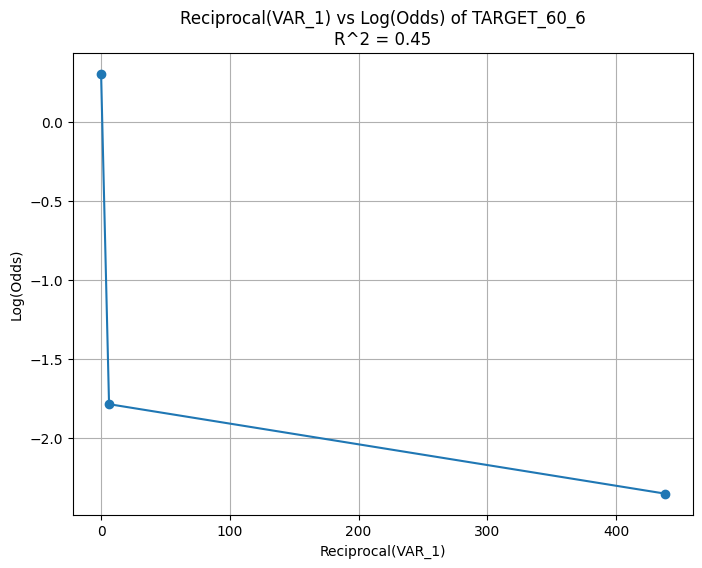

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_transformed_vs_logodds(df, variables, target):
    transformations = {
        'Original': lambda x: x,
        'Log': lambda x: np.log(x + 1),  # Adicionamos 1 para evitar log(0)
        'Quadratic': lambda x: x**2,
        'Square Root': lambda x: np.sqrt(x),
        'Reciprocal': lambda x: 1 / (x + 1)  # Adicionamos 1 para evitar divisão por zero
    }

    for variable in variables:
        for transform_name, transform_function in transformations.items():
            transformed_var = transform_function(df[variable])

            # Verificando o número de valores únicos
            unique_vals = transformed_var.nunique()
            if unique_vals == 1:
                continue

            n_bins = min(10, unique_vals)

            # Criando bins para a variável transformada
            df['bin'] = pd.cut(transformed_var, bins=n_bins, labels=False, duplicates='drop')

            # Calculando a proporção de eventos positivos para cada bin
            mean_target = df.groupby('bin')[target].mean()

            # Calculando o log(odds) e tratando valores infinitos
            log_odds = np.log(mean_target / (1 - mean_target)).replace([np.inf, -np.inf], np.nan).dropna()

            # Calculando R^2
            X = df.groupby('bin')[transformed_var.name].mean()[log_odds.index].values.reshape(-1, 1)
            y = log_odds.values
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)

            # Plotando
            plt.figure(figsize=(8, 6))
            plt.plot(X, y, marker='o')
            plt.xlabel(f'{transform_name}({variable})')
            plt.ylabel('Log(Odds)')
            plt.title(f'{transform_name}({variable}) vs Log(Odds) of {target}\nR^2 = {r2:.2f}')
            plt.grid(True)
            plt.show()

            # Removendo a coluna bin
            df.drop('bin', axis=1, inplace=True)

plot_transformed_vs_logodds(abt_train, categorize_vars, 'TARGET_60_6')


# Gerando a ABT com as variáveis transformadas

In [49]:
results_df

,Variable,Best Transformation,R^2 of Transformation,Feat Eng,Transformation Equation
0,VAR_7,Log,0.904997,Usar como contínua,Log(VAR_7)
1,VAR_10,Quadratic,0.781574,Categorizar,Quadratic(VAR_10)
2,VAR_5,Quadratic,0.702162,Categorizar,Quadratic(VAR_5)
3,VAR_9,Quadratic,0.673376,Categorizar,Quadratic(VAR_9)
4,VAR_2,Quadratic,0.906911,Usar como contínua,Quadratic(VAR_2)
5,VAR_1,Reciprocal,0.454067,Categorizar,Reciprocal(VAR_1)


In [50]:
categorize_vars

['VAR_7', 'VAR_10', 'VAR_5', 'VAR_9', 'VAR_2', 'VAR_1']

In [51]:
import pandas as pd
import numpy as np

def apply_best_transformations(results_df, original_df, drop_original=False):
    transformed_df = original_df.copy()

    transformations = {
        'Log': lambda x: np.log(x + 1),
        'Quadratic': lambda x: x**2,
        'Square Root': lambda x: np.sqrt(x),
        'Reciprocal': lambda x: 1 / (x + 1)
    }

    variables_transformed = []

    for index, row in results_df.iterrows():
        variable = row['Variable']
        best_transform_name = row['Best Transformation']
        feat_eng = row['Feat Eng']

        # Aplica a transformação apenas se Feat Eng estiver marcada como "Categorizar"
        if feat_eng == 'Categorizar' and best_transform_name in transformations:
            transform_function = transformations[best_transform_name]
            transformed_var = transform_function(original_df[variable])
            transformed_df[f'TFE_{variable}'] = transformed_var
            variables_transformed.append(variable)

    # Descarta as variáveis originais se drop_original for True
    if drop_original:
        transformed_df.drop(variables_transformed, axis=1, inplace=True)

    return transformed_df

abt_train_t01 = apply_best_transformations(results_df, abt_train_fs01,drop_original=True)
abt_teste_t01 = apply_best_transformations(results_df, abt_test_fs01,drop_original=True)

In [52]:
abt_train_t01.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TARGET_60_6,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1
4,11,883.10,184.36,1.0,0,0,1.000000,1.000000,0.005395
5,11,0.00,13.80,1.0,0,0,0.826446,0.694444,1.000000
6,12,0.00,142.72,1.0,0,0,1.000000,1.000000,0.006958
7,5,1582.00,326.39,1.0,0,0,1.000000,1.000000,0.003049
8,3,66.66,535.60,1.0,0,64,1.000000,1.000000,0.001864


In [53]:
abt_teste_t01.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TARGET_60_6,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1
0,12,0.00,97.49,1.000000,0,0,1.000000,1.000000,0.010101
1,12,1346.35,289.51,1.000000,0,0,1.000000,1.000000,0.003442
2,5,717.91,106.16,1.000000,0,49,0.694444,0.694444,0.009332
3,12,50.87,1243.32,0.666667,0,0,0.340278,0.250000,0.000804
12,12,215.04,721.20,1.000000,0,0,1.000000,1.000000,0.001385


<Axes: >

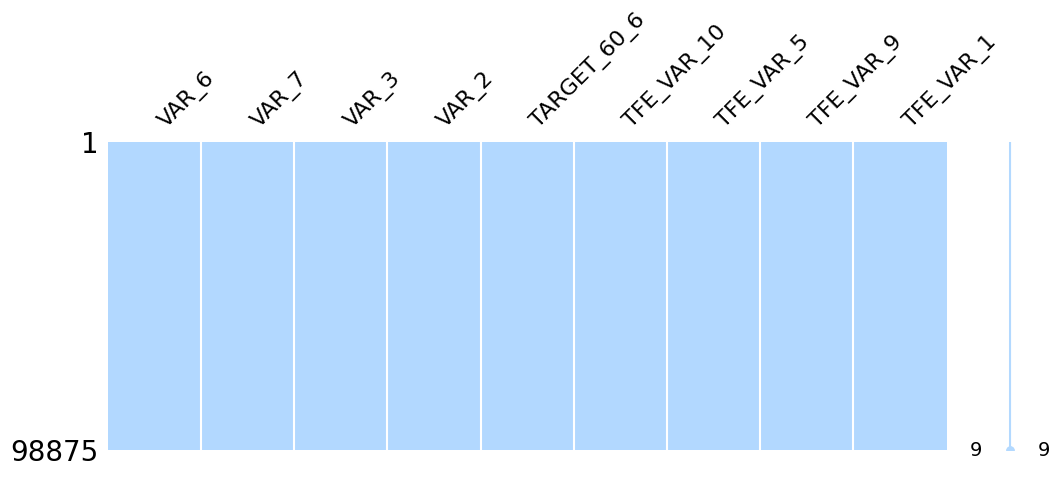

In [54]:
# Visualizando o mapa de missing usando missingno em tom azul
msno.matrix(abt_train_t01, color=(0.7, 0.85, 1), figsize=(12, 4))

# 4. Modeling: Regressão Logística

In [55]:
list(abt_train_t01.columns)

['VAR_6',
 'VAR_7',
 'VAR_3',
 'VAR_2',
 'TARGET_60_6',
 'TFE_VAR_10',
 'TFE_VAR_5',
 'TFE_VAR_9',
 'TFE_VAR_1']

In [56]:
lista_features_rl = ['VAR_6',
 'VAR_7',
 'VAR_3',
 'VAR_2',
 'TFE_VAR_10',
 'TFE_VAR_5',
 'TFE_VAR_9',
 'TFE_VAR_1']

In [59]:
import pandas as pd
import statsmodels.api as sm

def logistic_regression_with_scorecard(data, target_var, features):
    # Adicionando uma constante ao dataset (intercepto)
    data = sm.add_constant(data)

    # Ajustando o modelo de regressão logística
    model = sm.Logit(data[target_var], data[features + ['const']]).fit()
    # model = sm.Logit(data[target_var], data[features]).fit()

    # Coletando p-valores e estatísticas de Wald
    summary = model.summary2().tables[1]
    summary['Wald'] = summary['z']**2
    scorecard = summary[['Coef.', 'P>|z|', 'Wald']]
    scorecard.columns = ['Beta Coefficient', 'P-Value', 'Wald Statistic']
    scorecard = scorecard.sort_values(by='Wald Statistic', ascending=False)

    return model, scorecard

model, scorecard = logistic_regression_with_scorecard(abt_train_t01, 'TARGET_60_6', lista_features_rl)
scorecard


Optimization terminated successfully.
         Current function value: 0.282475
         Iterations 7


,Beta Coefficient,P-Value,Wald Statistic
TFE_VAR_1,2.411381,0.000000e+00,5791.324400
VAR_7,0.000316,1.672512e-98,443.726751
TFE_VAR_5,-1.276830,2.023716e-64,287.202347
VAR_6,-0.086972,7.350383e-60,266.277144
VAR_3,0.000361,4.823564e-39,170.850699
TFE_VAR_9,-0.815455,3.003324e-21,89.541109
TFE_VAR_10,0.007832,2.355814e-20,85.467163
VAR_2,-0.590100,8.573416e-19,78.363209
const,0.112641,9.766173e-02,2.743319


- Se a estatística de Wald para uma variável é significativamente grande, isso sugere que a variável é um preditor significativo no modelo.
  
- Se a estatística de Wald é pequena, isso indica que a variável pode não ser um preditor significativo.

 # 5. Evaluation: Escorando as bases de treino e teste

In [60]:
model

In [61]:
abt_train_t01.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TARGET_60_6,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1
4,11,883.10,184.36,1.0,0,0,1.000000,1.000000,0.005395
5,11,0.00,13.80,1.0,0,0,0.826446,0.694444,1.000000
6,12,0.00,142.72,1.0,0,0,1.000000,1.000000,0.006958
7,5,1582.00,326.39,1.0,0,0,1.000000,1.000000,0.003049
8,3,66.66,535.60,1.0,0,64,1.000000,1.000000,0.001864


In [62]:
abt_train_t01['const'] = 1.0
abt_teste_t01['const'] = 1.0

abt_train_t01 = abt_train_t01.drop(axis=1,columns='TARGET_60_6')
abt_teste_t01 = abt_teste_t01.drop(axis=1,columns='TARGET_60_6')

In [63]:
abt_train_t01.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1,const
4,11,883.10,184.36,1.0,0,1.000000,1.000000,0.005395,1.0
5,11,0.00,13.80,1.0,0,0.826446,0.694444,1.000000,1.0
6,12,0.00,142.72,1.0,0,1.000000,1.000000,0.006958,1.0
7,5,1582.00,326.39,1.0,0,1.000000,1.000000,0.003049,1.0
8,3,66.66,535.60,1.0,64,1.000000,1.000000,0.001864,1.0


In [64]:
model

In [65]:
abt_train_t01['Score_1'] = model.predict(abt_train_t01).round(4)
abt_teste_t01['Score_1'] = model.predict(abt_teste_t01).round(4)

abt_train_t01['Score_0'] = 1 - abt_train_t01['Score_1']
abt_teste_t01['Score_0'] = 1 - abt_teste_t01['Score_1']

In [66]:
abt_train_t01.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1,const,Score_1,Score_0
4,11,883.10,184.36,1.0,0,1.000000,1.000000,0.005395,1.0,0.0404,0.9596
5,11,0.00,13.80,1.0,0,0.826446,0.694444,1.000000,1.0,0.3454,0.6546
6,12,0.00,142.72,1.0,0,1.000000,1.000000,0.006958,1.0,0.0281,0.9719
7,5,1582.00,326.39,1.0,0,1.000000,1.000000,0.003049,1.0,0.0848,0.9152
8,3,66.66,535.60,1.0,64,1.000000,1.000000,0.001864,1.0,0.1081,0.8919


In [67]:
abt_teste_t01.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1,const,Score_1,Score_0
0,12,0.00,97.49,1.000000,0,1.000000,1.000000,0.010101,1.0,0.0278,0.9722
1,12,1346.35,289.51,1.000000,0,1.000000,1.000000,0.003442,1.0,0.0442,0.9558
2,5,717.91,106.16,1.000000,49,0.694444,0.694444,0.009332,1.0,0.1553,0.8447
3,12,50.87,1243.32,0.666667,0,0.340278,0.250000,0.000804,1.0,0.1831,0.8169
12,12,215.04,721.20,1.000000,0,1.000000,1.000000,0.001385,1.0,0.0362,0.9638


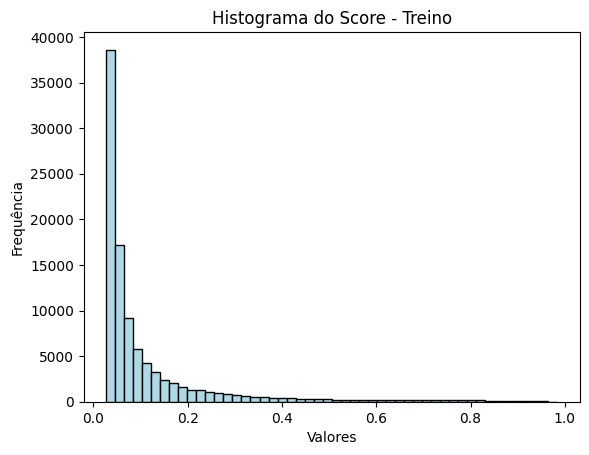

In [68]:
import numpy as np
import matplotlib.pyplot as plt


# Plotando o histograma
plt.hist(abt_train_t01.Score_1, color='lightblue', bins=50, edgecolor='black')
plt.title("Histograma do Score - Treino")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

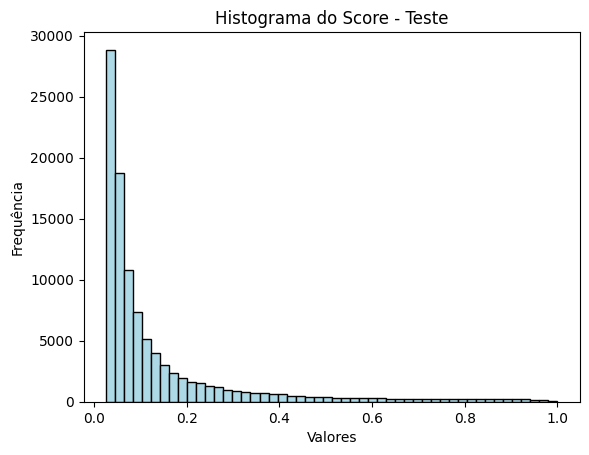

In [69]:
# Plotando o histograma
plt.hist(abt_teste_t01.Score_1, color='lightblue', bins=50, edgecolor='black')
plt.title("Histograma do Score - Teste")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

In [70]:
#### Trazer o id e target para a tabela pós dataprep

abt_train_t02 = abt_train_t01.merge(abt_train_fs01[['TARGET_60_6']], left_index=True, right_index=True, how='inner')
abt_teste_t02 = abt_teste_t01.merge(abt_test_fs01[['TARGET_60_6']], left_index=True, right_index=True, how='inner')

In [71]:
abt_train_t02.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1,const,Score_1,Score_0,TARGET_60_6
4,11,883.10,184.36,1.0,0,1.000000,1.000000,0.005395,1.0,0.0404,0.9596,0
5,11,0.00,13.80,1.0,0,0.826446,0.694444,1.000000,1.0,0.3454,0.6546,0
6,12,0.00,142.72,1.0,0,1.000000,1.000000,0.006958,1.0,0.0281,0.9719,0
7,5,1582.00,326.39,1.0,0,1.000000,1.000000,0.003049,1.0,0.0848,0.9152,0
8,3,66.66,535.60,1.0,64,1.000000,1.000000,0.001864,1.0,0.1081,0.8919,0


In [72]:
abt_teste_t02.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1,const,Score_1,Score_0,TARGET_60_6
0,12,0.00,97.49,1.000000,0,1.000000,1.000000,0.010101,1.0,0.0278,0.9722,0
1,12,1346.35,289.51,1.000000,0,1.000000,1.000000,0.003442,1.0,0.0442,0.9558,0
2,5,717.91,106.16,1.000000,49,0.694444,0.694444,0.009332,1.0,0.1553,0.8447,0
3,12,50.87,1243.32,0.666667,0,0.340278,0.250000,0.000804,1.0,0.1831,0.8169,0
12,12,215.04,721.20,1.000000,0,1.000000,1.000000,0.001385,1.0,0.0362,0.9638,0


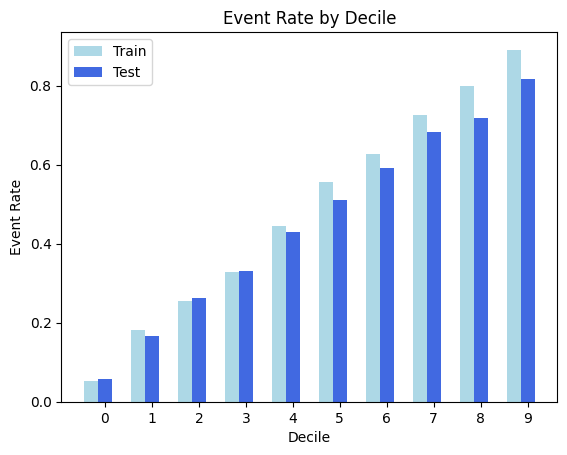

,Metric,Train Value,Test Value
0,KS,0.475086,0.463452
1,AUC,0.809258,0.806346
2,Gini,0.618515,0.612692


In [73]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import pandas as pd
import numpy as np

def calculate_metrics(train_df, test_df, score_column, target_column,bins=10):
    def compute_metrics(df, score_column, target_column):
        df_sorted = df.sort_values(by=score_column, ascending=False)

        # Calcular KS
        df_sorted['cum_good'] = (1 - df_sorted[target_column]).cumsum() / (1 - df_sorted[target_column]).sum()
        df_sorted['cum_bad'] = df_sorted[target_column].cumsum() / df_sorted[target_column].sum()
        df_sorted['ks'] = np.abs(df_sorted['cum_good'] - df_sorted['cum_bad'])
        ks_statistic = df_sorted['ks'].max()

        # Calcular AUC
        auc_value = roc_auc_score(df_sorted[target_column], df_sorted[score_column])

        # Calcular Gini
        gini = 2 * auc_value - 1

        # Dividir o score em 10 faixas
        df_sorted['decile'] = pd.cut(df_sorted[score_column], bins, labels=False)

        # Criar tabela detalhada
        table = df_sorted.groupby('decile').agg(
            min_score=pd.NamedAgg(column=score_column, aggfunc='min'),
            max_score=pd.NamedAgg(column=score_column, aggfunc='max'),
            event_rate=pd.NamedAgg(column=target_column, aggfunc='mean'),
            volume=pd.NamedAgg(column=target_column, aggfunc='size')
        ).reset_index()

        return ks_statistic, auc_value, gini, table

    ks_train, auc_train, gini_train, table_train = compute_metrics(train_df, score_column, target_column)
    ks_test, auc_test, gini_test, table_test = compute_metrics(test_df, score_column, target_column)

    # Plotando o gráfico de barras para Event Rate por Decil
    barWidth = 0.3
    r1 = np.arange(len(table_train))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, table_train['event_rate'], color='lightblue', width=barWidth, label='Train')
    plt.bar(r2, table_test['event_rate'], color='royalblue', width=barWidth, label='Test')

    plt.xlabel('Decile')
    plt.ylabel('Event Rate')
    plt.title('Event Rate by Decile')
    plt.xticks([r + barWidth for r in range(len(table_train))], table_train['decile'])
    plt.legend()
    plt.show()

    # Criando DataFrame para as métricas
    metrics_df = pd.DataFrame({
        'Metric': ['KS', 'AUC', 'Gini'],
        'Train Value': [ks_train, auc_train, gini_train],
        'Test Value': [ks_test, auc_test, gini_test]
    })

    return metrics_df, table_train, table_test

metrics, ord_score_train,vord_score_test = calculate_metrics(abt_train_t02, abt_teste_t02, 'Score_1', 'TARGET_60_6',bins=10)
metrics

In [74]:
ord_score_train

,decile,min_score,max_score,event_rate,volume
0,0,0.0272,0.1228,0.053225,75078
1,1,0.1229,0.2184,0.182510,10646
2,2,0.2185,0.3140,0.255237,4917
3,3,0.3141,0.4097,0.329306,2566
4,4,0.4099,0.5053,0.444583,1606
5,5,0.5054,0.6005,0.556757,1110
6,6,0.6015,0.6966,0.625844,1037
7,7,0.6968,0.7921,0.724971,869
8,8,0.7923,0.8878,0.799419,688
9,9,0.8879,0.9835,0.891061,358


Lembrando as nossas bases de treino e teste

In [75]:
# Filtrando a base de treino
abt_treino = abt_00[(abt_00['PK_DATREF'] >= '201901') & (abt_00['PK_DATREF'] <= '201907')]

# Filtrando a base de teste
abt_teste = abt_00[(abt_00['PK_DATREF'] >= '201908') & (abt_00['PK_DATREF'] <= '202001')]

In [76]:
abt_treino.head()

,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,TARGET_60_6,PK_ID,PK_DATREF
4,184.36,1.0,184.36,1.0,1.000000,11,883.10,1.0,1.000000,0,1.0,99999.0,NaN,0.916667,0.0,0,2052325,201905
5,0.00,1.0,13.80,1.0,0.909091,11,0.00,1.0,0.833333,0,1.0,99999.0,NaN,0.833333,0.0,0,8344658,201903
6,142.72,1.0,142.72,1.0,1.000000,12,0.00,1.0,1.000000,0,1.0,99999.0,NaN,1.000000,0.0,0,20331932,201903
7,327.00,1.0,326.39,1.0,1.000000,5,1582.00,1.0,1.000000,0,1.0,99999.0,NaN,0.416667,0.0,0,19950320,201906
8,535.60,1.0,535.60,1.0,1.000000,3,66.66,1.0,1.000000,8,1.0,99999.0,NaN,0.916667,2.0,0,34268249,201907


# Trazer a variavel de safra para a base escorada

In [77]:
abt_train_t03 = abt_train_t02.merge(abt_treino[['PK_DATREF']], left_index=True, right_index=True, how='inner')
abt_teste_t03 = abt_teste_t02.merge(abt_teste[['PK_DATREF']], left_index=True, right_index=True, how='inner')

In [78]:
abt_train_t03.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1,const,Score_1,Score_0,TARGET_60_6,PK_DATREF
4,11,883.10,184.36,1.0,0,1.000000,1.000000,0.005395,1.0,0.0404,0.9596,0,201905
5,11,0.00,13.80,1.0,0,0.826446,0.694444,1.000000,1.0,0.3454,0.6546,0,201903
6,12,0.00,142.72,1.0,0,1.000000,1.000000,0.006958,1.0,0.0281,0.9719,0,201903
7,5,1582.00,326.39,1.0,0,1.000000,1.000000,0.003049,1.0,0.0848,0.9152,0,201906
8,3,66.66,535.60,1.0,64,1.000000,1.000000,0.001864,1.0,0.1081,0.8919,0,201907


In [79]:
abt_teste_t03.head()

,VAR_6,VAR_7,VAR_3,VAR_2,TFE_VAR_10,TFE_VAR_5,TFE_VAR_9,TFE_VAR_1,const,Score_1,Score_0,TARGET_60_6,PK_DATREF
0,12,0.00,97.49,1.000000,0,1.000000,1.000000,0.010101,1.0,0.0278,0.9722,0,201908
1,12,1346.35,289.51,1.000000,0,1.000000,1.000000,0.003442,1.0,0.0442,0.9558,0,202001
2,5,717.91,106.16,1.000000,49,0.694444,0.694444,0.009332,1.0,0.1553,0.8447,0,201908
3,12,50.87,1243.32,0.666667,0,0.340278,0.250000,0.000804,1.0,0.1831,0.8169,0,201912
12,12,215.04,721.20,1.000000,0,1.000000,1.000000,0.001385,1.0,0.0362,0.9638,0,201909


Calculo do KS e Gini por safra

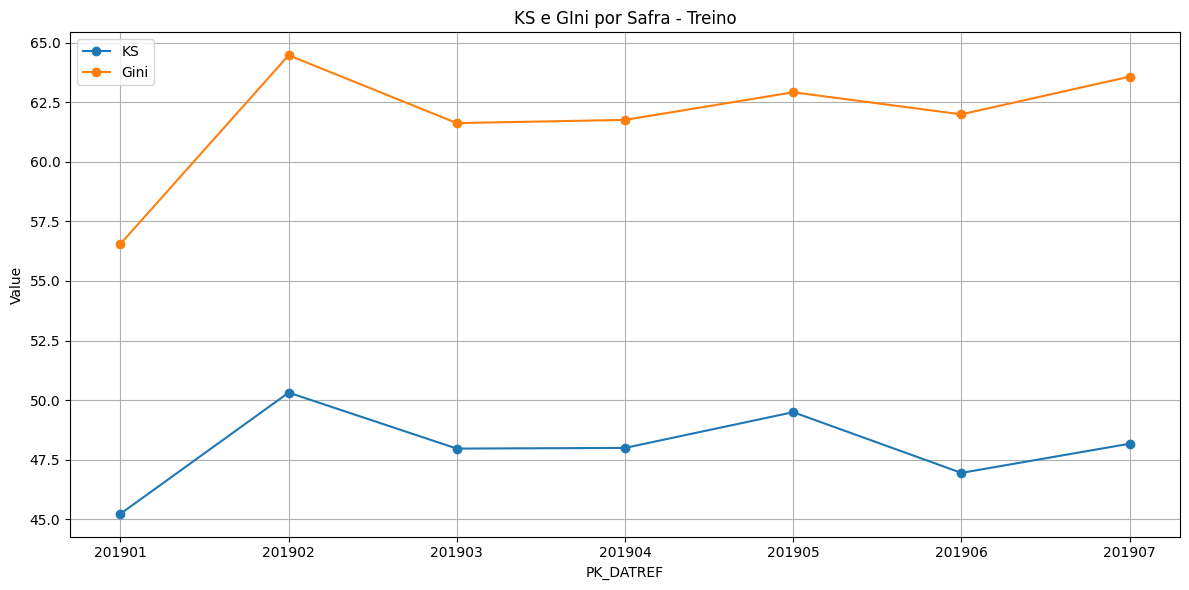

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve

def calculate_ks(y_true, y_score):
    """Calculate KS statistic."""
    fpr, tpr, _ = roc_curve(y_true, y_score)
    return 100*max(tpr - fpr)

def calculate_gini(y_true, y_score):
    """Calculate Gini coefficient."""
    return (2 * roc_auc_score(y_true, y_score) - 1)*100

def plot_ks_gini_by_datref(df, target_col, score_col, datref_col,titulo='KS e GIni por Safra'):
    unique_dates = sorted(df[datref_col].unique())
    ks_values = []
    gini_values = []

    for date in unique_dates:
        subset = df[df[datref_col] == date]
        y_true = subset[target_col]
        y_score = subset[score_col]

        ks_values.append(calculate_ks(y_true, y_score))
        gini_values.append(calculate_gini(y_true, y_score))

    plt.figure(figsize=(12, 6))
    plt.plot(unique_dates, ks_values, label='KS', marker='o')
    plt.plot(unique_dates, gini_values, label='Gini', marker='o')
    plt.xlabel(datref_col)
    plt.ylabel('Value')
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_ks_gini_by_datref(abt_train_t03, 'TARGET_60_6', 'Score_1', 'PK_DATREF',titulo='KS e GIni por Safra - Treino')

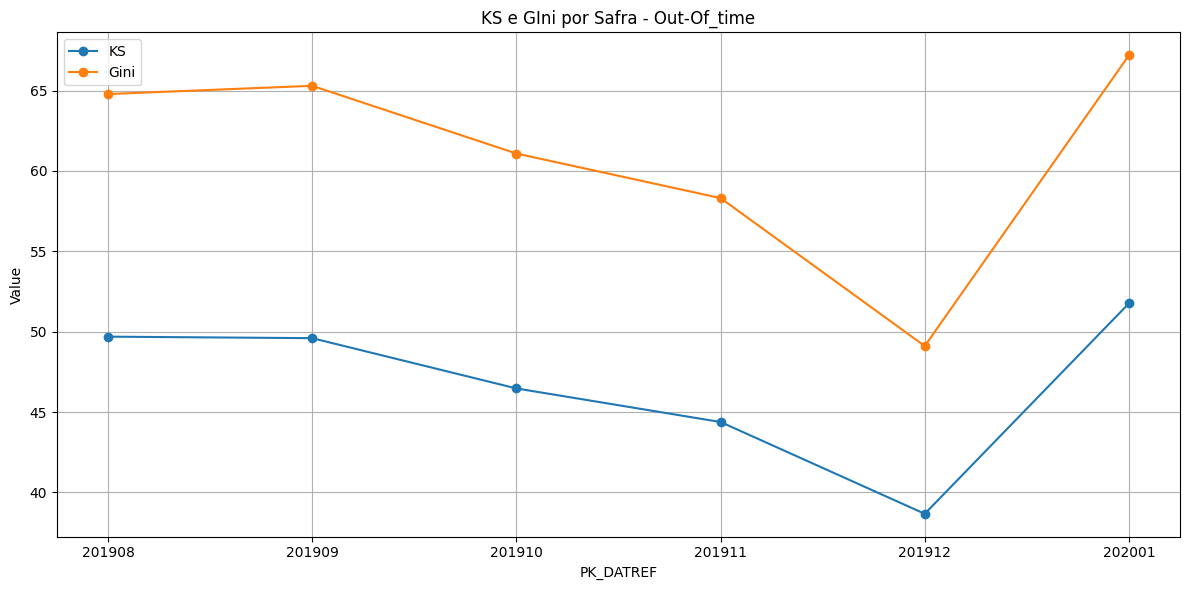

In [81]:
plot_ks_gini_by_datref(abt_teste_t03, 'TARGET_60_6', 'Score_1', 'PK_DATREF',titulo='KS e GIni por Safra - Out-Of_time')

In [82]:
abt_full = abt_train_t03.append(abt_teste_t03)
abt_full.shape

<ipython-input-82-007cf19cad2b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  abt_full = abt_train_t03.append(abt_teste_t03)


(200043, 13)

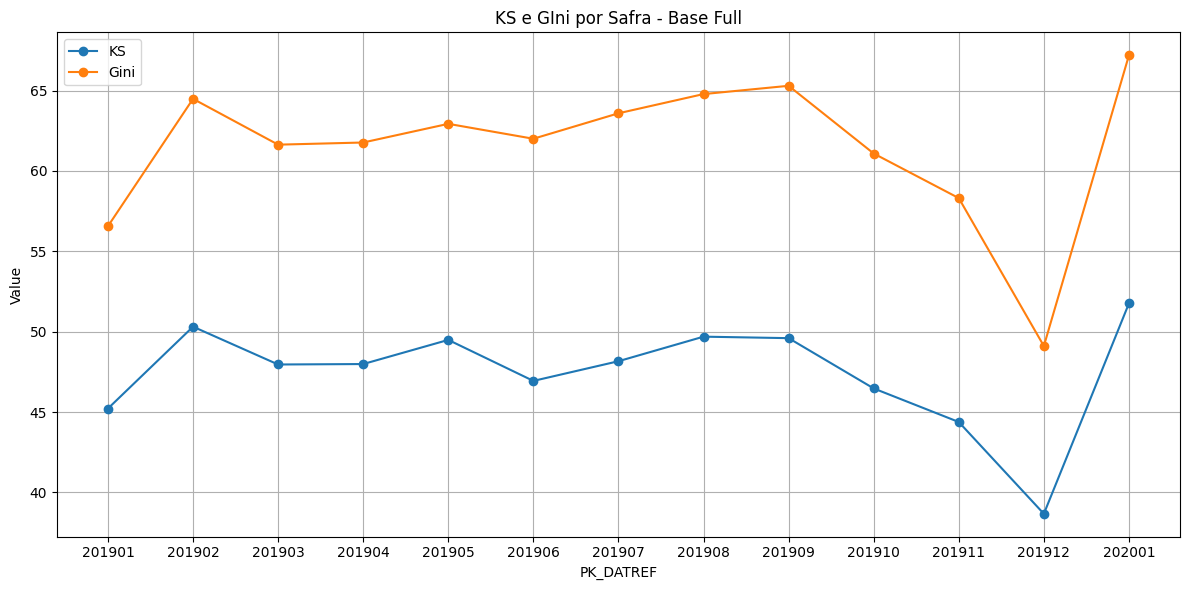

In [83]:
plot_ks_gini_by_datref(abt_full, 'TARGET_60_6', 'Score_1', 'PK_DATREF',titulo='KS e GIni por Safra - Base Full')

O Índice de Estabilidade Populacional (Population Stability Index - PSI) é uma métrica utilizada para determinar a estabilidade de um modelo de score ao longo do tempo, comparando a distribuição dos scores em diferentes momentos (por exemplo, entre a distribuição dos scores em uma amostra de desenvolvimento e uma amostra de validação).

Um valor PSI elevado indica que a distribuição dos scores mudou significativamente entre as duas amostras, o que pode ser um sinal de que o modelo não é estável ao longo do tempo.

In [84]:
import numpy as np

def calculate_psi(expected_scores, actual_scores, num_bins=10):
    """
    Calculate the Population Stability Index (PSI) between expected and actual scores.

    Parameters:
    - expected_scores: Scores from the development (or training) set.
    - actual_scores: Scores from the validation (or testing) set.
    - num_bins: Number of bins to use for score distributions.

    Returns:
    - psi_value: Calculated PSI value.
    """

    # Create bins for scores
    bin_edges = np.linspace(min(expected_scores.min(), actual_scores.min()),
                            max(expected_scores.max(), actual_scores.max()),
                            num_bins + 1)

    # Get the expected and actual proportions for each bin
    expected_proportions, _ = np.histogram(expected_scores, bins=bin_edges)
    actual_proportions, _ = np.histogram(actual_scores, bins=bin_edges)

    # Convert counts to proportions
    expected_proportions = expected_proportions / len(expected_scores)
    actual_proportions = actual_proportions / len(actual_scores)

    # Calculate PSI for each bin
    psi_bins = (actual_proportions - expected_proportions) * np.where(actual_proportions != 0,
                                                                       np.log(actual_proportions / expected_proportions),
                                                                       0)

    # Total PSI
    psi_value = np.sum(psi_bins)

    return psi_value


psi_value = calculate_psi(abt_train_t03.Score_1, abt_teste_t03.Score_1, num_bins=10)
psi_value


0.023492457064687677

Os valores do PSI podem ser interpretados da seguinte forma:

PSI < 0,1: A mudança é insignificante, o que significa que a distribuição dos scores é muito semelhante entre os dois conjuntos de dados. O modelo é considerado estável.

0,1 ≤ PSI < 0,25: Alguma mudança na distribuição dos scores foi detectada, mas geralmente é aceitável. Monitoramento é recomendado.

PSI ≥ 0,25: A mudança é significativa, indicando que a distribuição dos scores é consideravelmente diferente entre os dois conjuntos de dados. Isso pode ser um sinal de que o modelo não é mais adequado e pode precisar ser recalibrado ou reajustado.